## Credit Card Default Detection Project

### Aim

In this project, our objective is to analyze the credit card data and develop a default predition model.

### Dataset Information

The dataset has 25 columns and 30,000 records. The following features were present in the data:

1 - ID : ID of each client

2 - LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)

3 - SEX : Gender (1=male, 2=female)

4 - EDUCATION : (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

5 - MARRIAGE : Marital status (1=married, 2=single, 3=others)

6 - AGE : Age in years

7 - PAY_0: Repayment status in September, 2005 

8 - PAY_2: Repayment status in August, 2005

9 - PAY_3: Repayment status in July, 2005

10- PAY_4: Repayment status in June, 2005

11- PAY_5: Repayment status in May, 2005

12- PAY_6: Repayment status in April, 2005

13- BILL_AMT1: Amount of bill statement in September, 2005

14- BILL_AMT2: Amount of bill statement in August, 2005

15- BILL_AMT3: Amount of bill statement in July, 2005 

16- BILL_AMT4: Amount of bill statement in June, 2005

17- BILL_AMT5: Amount of bill statement in May, 2005

18- BILL_AMT6: Amount of bill statement in April, 2005

19- PAY_AMT1: Amount of previous payment in September, 2005

20- PAY_AMT2: Amount of previous payment in August, 2005

21- PAY_AMT3: Amount of previous payment in July, 2005

22- PAY_AMT4: Amount of previous payment in June, 2005

23- PAY_AMT5: Amount of previous payment in May, 2005

24- PAY_AMT6: Amount of previous payment in April, 2005

25- default.payment.next.month: Default payment (1=yes, 0=no) ---------- Target Variable

## Importing Libraries

In [1]:
import pandas as pd   
import matplotlib.pyplot as plt
import plotly.express as px
import time
import numpy as np
import warnings

from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE,SelectFromModel


from sklearn.model_selection import train_test_split, RepeatedKFold, GridSearchCV, cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import KFold, cross_val_score

from sklearn.pipeline import Pipeline
from matplotlib import pyplot
# the permutation based importance
import seaborn as sns
from sklearn.inspection import permutation_importance

from numpy import mean
import warnings
warnings.filterwarnings("ignore") 

## Loading Dataset

In [2]:
# Importing Dataset using Pandas.
data = pd.read_csv("Credit Card.csv")
data.shape  

(30000, 25)

In [4]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [7]:
# Checking out all the columns names.
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

## Exploratory Data Analysis - EDA

Here we are performing EDA to gain insights and understanding of the data we are working with.

In [5]:
# Counting Number of Class.
dictribution = data["default.payment.next.month"].value_counts()
dictribution

0    23364
1     6636
Name: default.payment.next.month, dtype: int64

We can see that distribution of class label is imbalanced in our dataset. There are 23,364 records of non-default and 6,636 records of default payments.We have 2 classes so its a binary class classififcation task. Now plotting this distribution in graphical form.

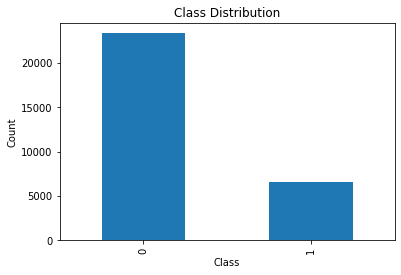

In [6]:
class_counts = data['default.payment.next.month'].value_counts()
class_counts.plot(kind='bar')

plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')

plt.show()

Now we are plotting the distribution plot of Gender. To check out the gender based count.

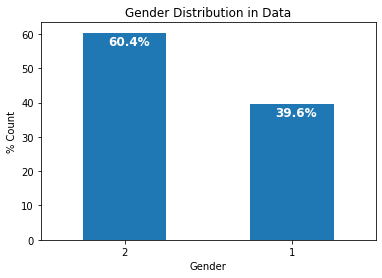

In [8]:
ax = (data['SEX'].value_counts()*100.0 /len(data)).plot(kind='bar', stacked = True,rot = 0)
ax.set_ylabel('% Count')
ax.set_xlabel('Gender')
ax.set_ylabel('% Count')
ax.set_title('Gender Distribution in Data')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

Here 2 = Female and 1 = Male

Number of records having female is more as compare to the male records.

Now we are plotting distribution with respect to marriage. To check out the marital status of the members.

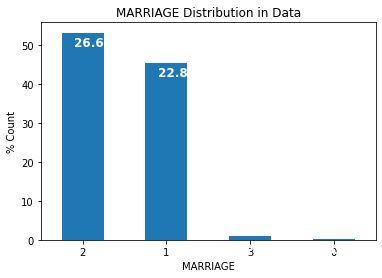

In [9]:
ax = (data['MARRIAGE'].value_counts()*100.0 /len(data)).plot(kind='bar', stacked = True,rot = 0)
ax.set_ylabel('% Count')
ax.set_xlabel('MARRIAGE')
ax.set_ylabel('% Count')
ax.set_title('MARRIAGE Distribution in Data')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

Here 2 = Single, 1 = Married, and 3 = Others

Most of the records in the dataset are from the people having marital status as single followed by married people.

In [3]:
# replacing 0 with 3 in the 'Marriage' column as according to Metadata we only have 3 classes in marriage column. so adding records with 0 in others category.
data['MARRIAGE'] = data['MARRIAGE'].replace(0, 3)

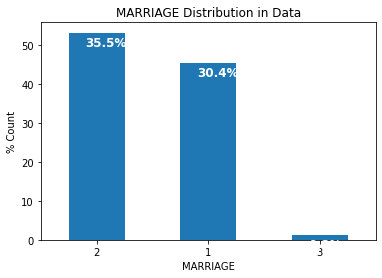

In [11]:
ax = (data['MARRIAGE'].value_counts()*100.0 /len(data)).plot(kind='bar', stacked = True,rot = 0)
ax.set_ylabel('% Count')
ax.set_xlabel('MARRIAGE')
ax.set_ylabel('% Count')
ax.set_title('MARRIAGE Distribution in Data')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

Now we are plotting the bar chart of Education level of the members. To check out the eduaction status of the members.

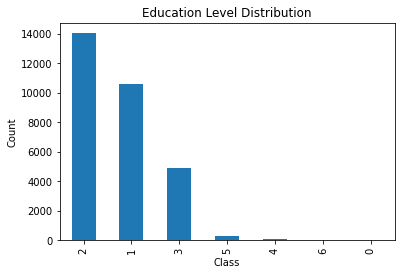

In [12]:
class_counts = data['EDUCATION'].value_counts()
class_counts.plot(kind='bar')

plt.title('Education Distribution')
plt.xlabel('Class')
plt.ylabel('Count')

plt.show()

In [4]:
# replace 0 with 3 in the 'Marriage' column as according to Metadata we only have 3 classes. so adding records with 0 in others.
data['EDUCATION'] = data['EDUCATION'].replace(0, 5)
data['EDUCATION'] = data['EDUCATION'].replace(6, 5)

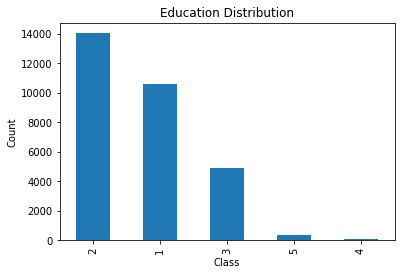

In [14]:
class_counts = data['EDUCATION'].value_counts()
class_counts.plot(kind='bar')

plt.title('Education Distribution')
plt.xlabel('Class')
plt.ylabel('Count')

plt.show()

Here 2 = University Level, 1 = Graduate School, 3 = High School, 4 = Others, 5 = Unknown

Most of the people in the dataset are university level graduate. There are also many people who are having graduate school level education followed by high school level people.

Now we are plotting the distribution plot of age. To check out the age category from which most of the memebers belong.

In [24]:
fig = px.histogram(data_frame=data, x="AGE", nbins=30, opacity=0.8)
fig.update_layout(title_text="Distribution of Age", xaxis_title="Age", yaxis_title="Count")
fig.show()

According to the distribution plot. Most of the people in the dataset are of age group 25-35. 

Now we are plotting the bar chart of eduaction level along with the Default target to check out the relation between both and which education level are defaulting more. 

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5')])

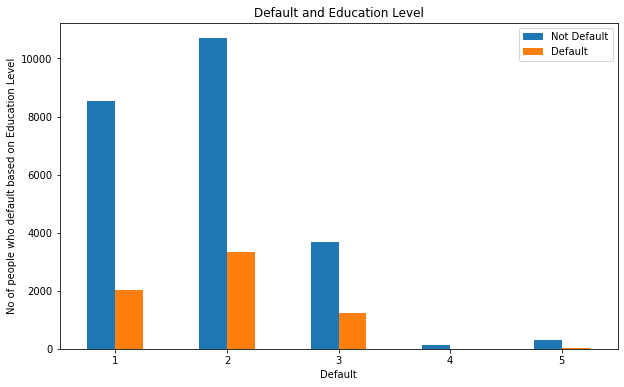

In [27]:
# Count of People left wrt Business functions.
pd.crosstab(data['EDUCATION'],data['default.payment.next.month']).plot(kind="bar",figsize=(10,6))
plt.title("Default and Education Level")
plt.xlabel("Default")
plt.ylabel("No of people who default based on Education Level")
plt.legend(["Not Default","Default"])
plt.xticks(rotation=0)

Here 2 = University Level, 1 = Graduate School, 3 = High School, 4 = Others, 5 = Unknown

Most of the default payments are from university level educated people but the rate of default is almost same in category 1 ,2 ,3.

Now we are plotting the bar chart of Gender along with the Default target to check out the relation between both and which gender are defaulting more. 

(array([0, 1]), [Text(0, 0, '1'), Text(1, 0, '2')])

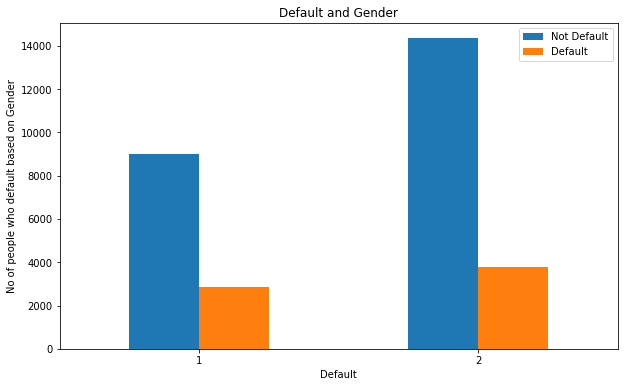

In [28]:
# Count of People left wrt Gender.
pd.crosstab(data['SEX'],data['default.payment.next.month']).plot(kind="bar",figsize=(10,6))
plt.title("Default and Gender")
plt.xlabel("Default")
plt.ylabel("No of people who default based on Gender")
plt.legend(["Not Default","Default"])
plt.xticks(rotation=0)

Here 2 = Female and 1 = Male.

From above graph we can observe that rate of default payment is high in Male members as compare to the female members.

(array([0, 1, 2]), [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3')])

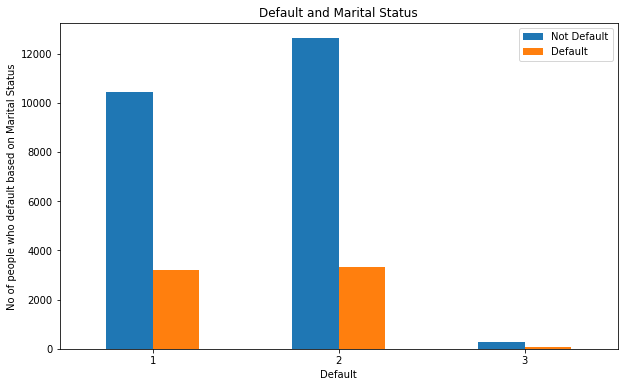

In [29]:
# Count of People left wrt Gender.
pd.crosstab(data['MARRIAGE'],data['default.payment.next.month']).plot(kind="bar",figsize=(10,6))
plt.title("Default and Marital Status")
plt.xlabel("Default")
plt.ylabel("No of people who default based on Marital Status")
plt.legend(["Not Default","Default"])
plt.xticks(rotation=0)

Here 2 = Single, 1 = Married, and 3 = Others

From above bar chart, we can observe that the rate of default payment are more high in married people as compare to the single.

Now we are plotting the distribution age of records who are having default payment. 

In [270]:
# Creating a dataset which contains only default payments records and checking its age distribution.

default_df = data[data['default.payment.next.month'] == 1] 
fig = px.histogram(data_frame=default_df, x="AGE", nbins=30, opacity=0.8, color_discrete_sequence=['green'])
fig.update_layout(title_text="Distribution of Age of defaulted members", xaxis_title="Age", yaxis_title="Count")
fig.show()

Most of the people with default payments are from age group 24-29.

In [44]:
fig = px.histogram(data_frame=data, x="LIMIT_BAL", nbins=30, opacity=0.8)
fig.update_layout(title_text="Distribution of Limit Balance", xaxis_title="Limit Balance", yaxis_title="Count")
fig.show()

Most of the People are having Limit Balance of range 50k-90k

In [51]:
fig = px.histogram(data_frame=default_df, x="LIMIT_BAL", nbins=30, opacity=0.8, color_discrete_sequence=['green'])
fig.update_layout(title_text="Distribution of Limit Balance (Default Members)", xaxis_title="Limit Balance", yaxis_title="Count")
fig.show()

Plotting correlation so we can analyze relation between diferent variables.

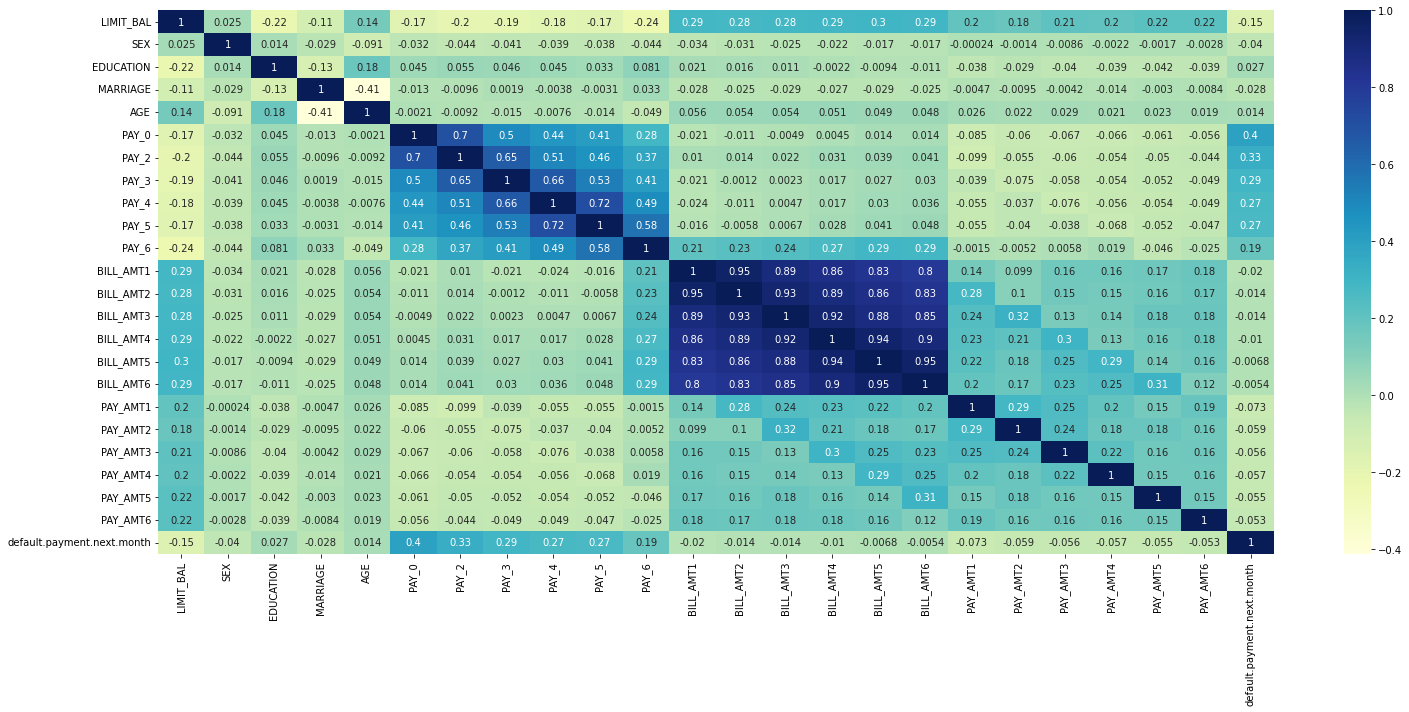

In [161]:
#Now lets try plotting the correlation heatmap

plt.figure(figsize = (25,10))
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)

plt.show()

Here in the correltion plot we can, Repayments features are positively correlated with the target variable. PAY_0 has highest positive corelation with the target variable. which means it will contribute much in the prediction of target variable. Limit Balance is the variable which in highly negatively correlated with target.

Mulitcollinearity is also present in the data as we can see the blue block in matrix.

## Data Pre Processing

In [55]:
# Checking Shape of the dataset.
print('Length of Dataset: ', data.shape[0])
print('Number of Attributes: ', data.shape[1])

Length of Dataset:  30000
Number of Attributes:  25


In [59]:
# Statistical Information about the data.
data.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853767,1.557267,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.784391,0.521405,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,1.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,5.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


Now checking out the data types of columns. All columns must be Continious Variales.

In [56]:
data.dtypes

ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object

In [57]:
# Checking Null values in all features.
data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

-1 = pay duly, 1 = payment delay for one month, 2 = payment delay for two months, 9=payment delay for nine months and above

In [63]:
data['PAY_0'].unique()

array([ 2, -1,  0, -2,  1,  3,  4,  8,  7,  5,  6], dtype=int64)

Replacing 0 and -2 and considering them in -1 category, as in metadata 0 and -2 category doesnot exist.

In [5]:
data['PAY_0'] = data['PAY_0'].replace(-2, -1)
data['PAY_0'] = data['PAY_0'].replace(0, -1)
data['PAY_0'].unique()

array([ 2, -1,  1,  3,  4,  8,  7,  5,  6], dtype=int64)

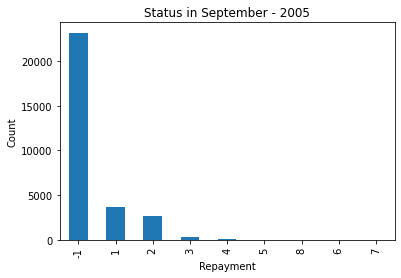

In [82]:
class_counts = data['PAY_0'].value_counts()
class_counts.plot(kind='bar')

plt.title('Status in September - 2005')
plt.xlabel('Repayment')
plt.ylabel('Count')

plt.show()

Most of the people are paying thier payments on time. There are some people whose payments are default.

In [69]:
data['PAY_2'].unique()

array([ 2,  0, -1, -2,  3,  5,  7,  4,  1,  6,  8], dtype=int64)

In [6]:
data['PAY_2'] = data['PAY_2'].replace(-2, -1)
data['PAY_2'] = data['PAY_2'].replace(0, -1)
data['PAY_2'].unique()

array([ 2, -1,  3,  5,  7,  4,  1,  6,  8], dtype=int64)

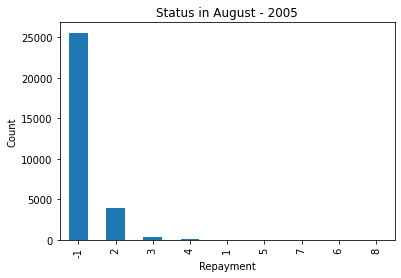

In [84]:
class_counts = data['PAY_2'].value_counts()
class_counts.plot(kind='bar')

plt.title('Status in August - 2005')
plt.xlabel('Repayment')
plt.ylabel('Count')

plt.show()

In [85]:
data['PAY_3'].unique()

array([-1,  0,  2,  3,  4,  6,  7,  1,  5,  8], dtype=int64)

In [7]:
data['PAY_3'] = data['PAY_3'].replace(-2, -1)
data['PAY_3'] = data['PAY_3'].replace(0, -1)
data['PAY_3'].unique()

array([-1,  2,  3,  4,  6,  7,  1,  5,  8], dtype=int64)

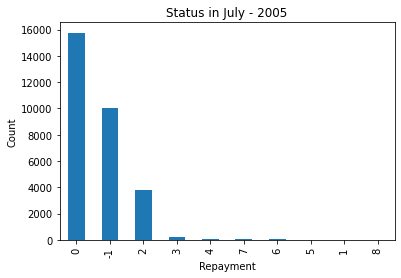

In [80]:
class_counts = data['PAY_3'].value_counts()
class_counts.plot(kind='bar')

plt.title('Status in July - 2005')
plt.xlabel('Repayment')
plt.ylabel('Count')

plt.show()

In [73]:
data['PAY_4'].unique()

array([-1,  0, -2,  2,  3,  4,  5,  7,  6,  1,  8], dtype=int64)

In [8]:
data['PAY_4'] = data['PAY_4'].replace(-2, -1)
data['PAY_4'] = data['PAY_4'].replace(0, -1)
data['PAY_4'].unique()

array([-1,  2,  3,  4,  5,  7,  6,  1,  8], dtype=int64)

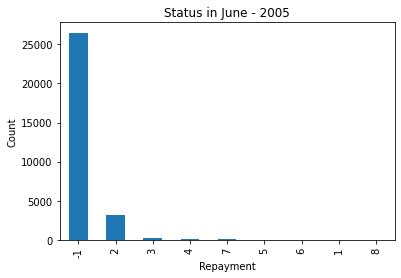

In [88]:
class_counts = data['PAY_4'].value_counts()
class_counts.plot(kind='bar')

plt.title('Status in June - 2005')
plt.xlabel('Repayment')
plt.ylabel('Count')

plt.show()

In [75]:
data['PAY_5'].unique()

array([-2,  0, -1,  2,  3,  5,  4,  7,  8,  6], dtype=int64)

In [9]:
data['PAY_5'] = data['PAY_5'].replace(-2, -1)
data['PAY_5'] = data['PAY_5'].replace(0, -1)
data['PAY_5'].unique()

array([-1,  2,  3,  5,  4,  7,  8,  6], dtype=int64)

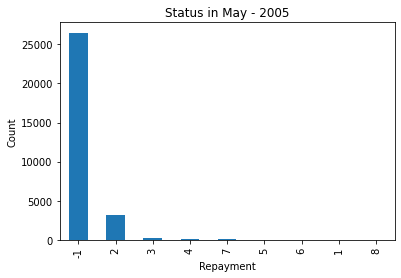

In [90]:
class_counts = data['PAY_4'].value_counts()
class_counts.plot(kind='bar')

plt.title('Status in May - 2005')
plt.xlabel('Repayment')
plt.ylabel('Count')

plt.show()

In [10]:
# Dropping Unnecessary Column.
data.drop('ID',axis=1,inplace=True)

## Train - Test Split

In [243]:
X = data.loc[:, data.columns != 'default.payment.next.month']     # All columns except target variable.
y = data[['default.payment.next.month']]                          # Target Variable.

Splitting dataset with 70-30 ratio.

In [244]:
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3, random_state=2)
print(trainX.shape)
print(trainy.shape)
print(testX.shape)
print(testy.shape)

(21000, 23)
(21000, 1)
(9000, 23)
(9000, 1)


In [250]:
features = trainX.columns
print(features)

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')


## Applying Machine Leaning Models

### Decision Tree Classifier

[0.72095238 0.71714286 0.73190476 0.72714286 0.70047619 0.72190476
 0.71904762 0.71809524 0.72428571 0.72428571]
Accuracy of DECISION TREE KFold with k=10: 72.05%
[[13254  3104]
 [ 2713  1929]]


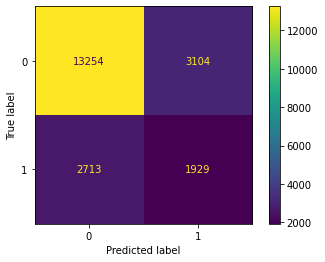

In [99]:
# K - FOLD Cross Validation.

kfold = KFold(n_splits=5, random_state=100, shuffle=True)

DT = DecisionTreeClassifier(max_depth=200)
results_kfold = cross_val_score(DT, trainX, trainy.values.ravel(), cv=10)
print(results_kfold)
print("Accuracy of DECISION TREE KFold with k=10: %.2f%%" % (results_kfold.mean()*100.0))


pred = cross_val_predict(DT, trainX, trainy.values.ravel(), cv=5)
conf_mat = confusion_matrix(trainy, pred)
print(conf_mat)
disp = ConfusionMatrixDisplay.from_predictions(trainy,pred)

In [100]:
DT = DecisionTreeClassifier(max_depth=200)
DT.fit(trainX,trainy)
y_pred = DT.predict(testX) 

Confusion Matrix:
[[5677 1329]
 [1143  851]]
------------------------------------
AUC Score: 0.6185428967461907
------------------------------------
Accuracy of Decision Tree: 72.53333333333333 %
------------------------------------
Recall: 0.4267803410230692
------------------------------------
Precision: 0.3903669724770642
------------------------------------
Specificity: 0.8103054524693121
------------------------------------
Sensitivity: 0.4267803410230692
------------------------------------
Miss Rate (False Positive Rate): 0.18969454753068798
------------------------------------
Miss Rate (False Negative Rate): 0.5732196589769308


Text(0.5, 1.0, 'Contribution of features in Model Performance')

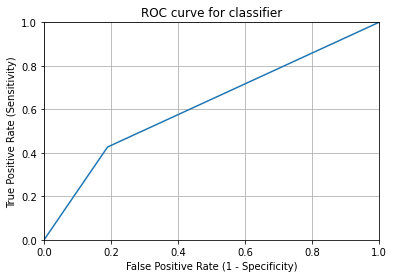

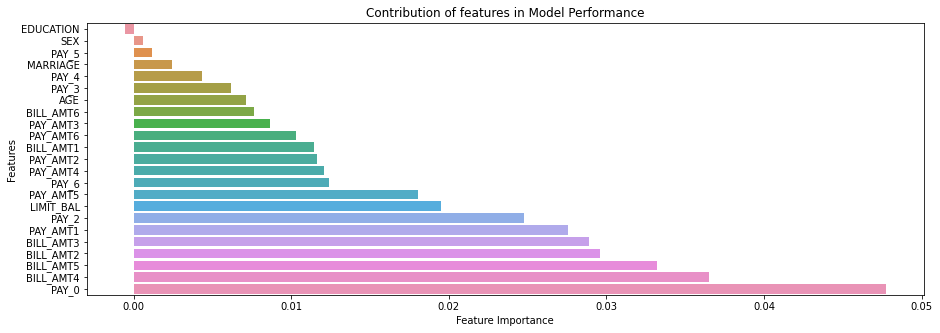

In [102]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testy,y_pred)
print("Confusion Matrix:")
print(cm)
print('------------------------------------')

AUC_Score = roc_auc_score(testy,y_pred)
print("AUC Score:",AUC_Score)
print('------------------------------------')


accuracy = DT.score(testX, testy)
print("Accuracy of Decision Tree:",accuracy*100,"%")
print('------------------------------------')


from sklearn.metrics import recall_score
recall = recall_score(testy,y_pred)
print("Recall:",recall)
print('------------------------------------')

from sklearn.metrics import precision_score
precision = precision_score(testy,y_pred)
print("Precision:",precision)
print('------------------------------------')

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Specificity:", specificity)
print('------------------------------------')

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print("Sensitivity:", sensitivity)

print('------------------------------------')
miss_rate = cm[0,1]/(cm[0,1]+cm[0,0])
print("Miss Rate (False Positive Rate):", miss_rate)

print('------------------------------------')
miss_rate_FNR = cm[1,0]/(cm[1,0]+cm[1,1])
print("Miss Rate (False Negative Rate):", miss_rate_FNR)

from sklearn import metrics
miss_rate, sensitivity, thresholds = metrics.roc_curve(testy, y_pred)
plt.plot(miss_rate, sensitivity)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

perm_importance = permutation_importance(DT, testX, testy)

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(15,5))
sns.barplot(y = features[sorted_idx], x = perm_importance.importances_mean[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Contribution of features in Model Performance")

### Random Forest Classifier

[0.83       0.81904762 0.83428571 0.82904762 0.81666667 0.80904762
 0.81380952 0.81190476 0.82428571 0.8147619 ]
Accuracy of Random Forest KFold with k=10: 82.03%
[[15600   758]
 [ 3017  1625]]


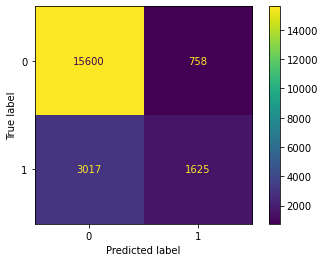

In [103]:
# K - FOLD Cross Validation.

kfold = KFold(n_splits=5, random_state=100, shuffle=True)

rf = RandomForestClassifier(max_depth=10,n_estimators = 1200)
results_kfold = cross_val_score(rf, trainX, trainy.values.ravel(), cv=10)
print(results_kfold)
print("Accuracy of Random Forest KFold with k=10: %.2f%%" % (results_kfold.mean()*100.0))


pred = cross_val_predict(rf, trainX, trainy.values.ravel(), cv=5)
conf_mat = confusion_matrix(trainy, pred)
print(conf_mat)
disp = ConfusionMatrixDisplay.from_predictions(trainy,pred)

In [106]:
rf = RandomForestClassifier(max_depth=10,n_estimators = 400)
rf.fit(trainX,trainy.values.ravel())
y_pred = rf.predict(testX)

Confusion Matrix:
[[6675  331]
 [1290  704]]
------------------------------------
AUC Score: 0.6529069795741778
------------------------------------
Accuracy of Random Forest: 81.9888888888889 %
------------------------------------
Recall: 0.3530591775325978
------------------------------------
Precision: 0.6801932367149759
------------------------------------
Specificity: 0.9527547816157579
------------------------------------
Sensitivity: 0.3530591775325978
------------------------------------
Miss Rate (False Positive Rate): 0.04724521838424208
------------------------------------
Miss Rate (False Negative Rate): 0.6469408224674023


Text(0.5, 1.0, 'Contribution of features in Model Performance')

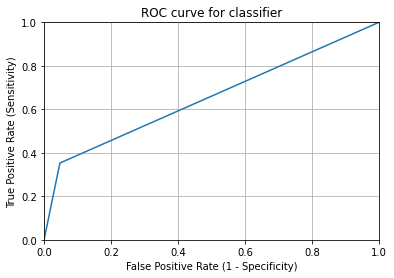

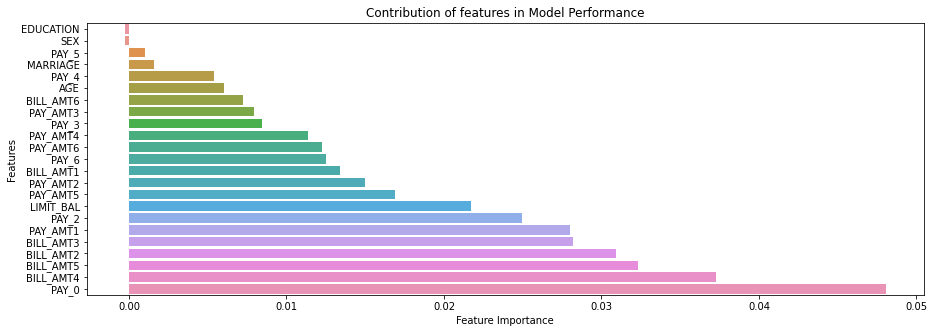

In [107]:
cm = confusion_matrix(testy,y_pred)
print("Confusion Matrix:")
print(cm)
print('------------------------------------')

AUC_Score = roc_auc_score(testy,y_pred)
print("AUC Score:",AUC_Score)
print('------------------------------------')


accuracy = rf.score(testX, testy)
print("Accuracy of Random Forest:",accuracy*100,"%")
print('------------------------------------')


from sklearn.metrics import recall_score
recall = recall_score(testy,y_pred)
print("Recall:",recall)
print('------------------------------------')

from sklearn.metrics import precision_score
precision = precision_score(testy,y_pred)
print("Precision:",precision)
print('------------------------------------')

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Specificity:", specificity)
print('------------------------------------')

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print("Sensitivity:", sensitivity)

print('------------------------------------')
miss_rate = cm[0,1]/(cm[0,1]+cm[0,0])
print("Miss Rate (False Positive Rate):", miss_rate)

print('------------------------------------')
miss_rate_FNR = cm[1,0]/(cm[1,0]+cm[1,1])
print("Miss Rate (False Negative Rate):", miss_rate_FNR)


miss_rate, sensitivity, thresholds = metrics.roc_curve(testy, y_pred)
plt.plot(miss_rate, sensitivity)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

perm_importance = permutation_importance(DT, testX, testy)

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(15,5))
sns.barplot(y = features[sorted_idx], x = perm_importance.importances_mean[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Contribution of features in Model Performance")

In [108]:
rf_cv = RandomForestClassifier()
param_grid = {
    'max_depth': [2, 5, 10, 20, 30, 40, 50],
    'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600] 
}
grid_search = GridSearchCV(estimator = rf_cv, param_grid=param_grid, cv = 3, verbose = 2)
grid_search.fit(trainX, trainy.values.ravel())
best_grid = grid_search.best_estimator_
print(best_grid)

Fitting 3 folds for each of 77 candidates, totalling 231 fits
[CV] END ......................max_depth=2, n_estimators=100; total time=   0.8s
[CV] END ......................max_depth=2, n_estimators=100; total time=   0.7s
[CV] END ......................max_depth=2, n_estimators=100; total time=   0.7s
[CV] END ......................max_depth=2, n_estimators=150; total time=   1.1s
[CV] END ......................max_depth=2, n_estimators=150; total time=   1.7s
[CV] END ......................max_depth=2, n_estimators=150; total time=   1.3s
[CV] END ......................max_depth=2, n_estimators=200; total time=   2.3s
[CV] END ......................max_depth=2, n_estimators=200; total time=   2.7s
[CV] END ......................max_depth=2, n_estimators=200; total time=   2.8s
[CV] END ......................max_depth=2, n_estimators=250; total time=   2.8s
[CV] END ......................max_depth=2, n_estimators=250; total time=   3.8s
[CV] END ......................max_depth=2, n_e

In [121]:
rf = RandomForestClassifier(max_depth=10,n_estimators = 250)
rf.fit(trainX,trainy.values.ravel())
y_pred = rf.predict(testX)

Confusion Matrix:
[[6674  332]
 [1283  711]]
------------------------------------
AUC Score: 0.654590877972198
------------------------------------
Accuracy of Random Forest: 82.05555555555556 %
------------------------------------
Recall: 0.3565697091273822
------------------------------------
Precision: 0.6816874400767018
------------------------------------
Specificity: 0.952612046817014
------------------------------------
Sensitivity: 0.3565697091273822
------------------------------------
Miss Rate (False Positive Rate): 0.04738795318298601
------------------------------------
Miss Rate (False Negative Rate): 0.6434302908726178


Text(0.5, 1.0, 'Contribution of features in Model Performance')

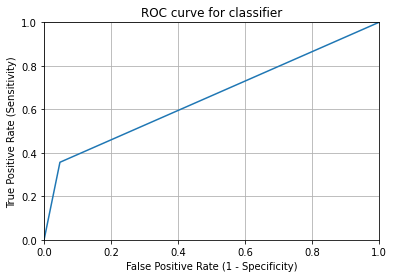

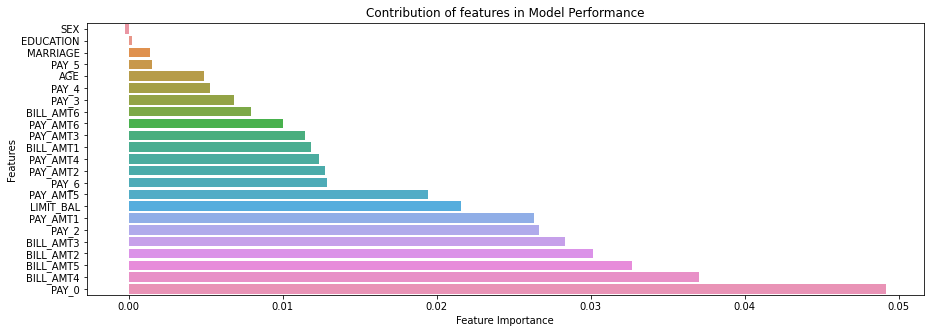

In [122]:
cm = confusion_matrix(testy,y_pred)
print("Confusion Matrix:")
print(cm)
print('------------------------------------')

AUC_Score = roc_auc_score(testy,y_pred)
print("AUC Score:",AUC_Score)
print('------------------------------------')


accuracy = rf.score(testX, testy)
print("Accuracy of Random Forest:",accuracy*100,"%")
print('------------------------------------')


from sklearn.metrics import recall_score
recall = recall_score(testy,y_pred)
print("Recall:",recall)
print('------------------------------------')

from sklearn.metrics import precision_score
precision = precision_score(testy,y_pred)
print("Precision:",precision)
print('------------------------------------')

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Specificity:", specificity)
print('------------------------------------')

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print("Sensitivity:", sensitivity)

print('------------------------------------')
miss_rate = cm[0,1]/(cm[0,1]+cm[0,0])
print("Miss Rate (False Positive Rate):", miss_rate)

print('------------------------------------')
miss_rate_FNR = cm[1,0]/(cm[1,0]+cm[1,1])
print("Miss Rate (False Negative Rate):", miss_rate_FNR)


miss_rate, sensitivity, thresholds = metrics.roc_curve(testy, y_pred)
plt.plot(miss_rate, sensitivity)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

perm_importance = permutation_importance(DT, testX, testy)

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(15,5))
sns.barplot(y = features[sorted_idx], x = perm_importance.importances_mean[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Contribution of features in Model Performance")

### K - Nearest Neighbor Classifier

In [18]:
#Note: .values.ravel( ) is used to eliminate dataconversion warning.
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(trainX,trainy.values.ravel())
y_pred = knn.predict(testX)

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testy,y_pred)
print("Confusion Matrix:")
print(cm)
print('------------------------------------')

AUC_Score = roc_auc_score(testy,y_pred)
print("AUC Score:",AUC_Score)
print('------------------------------------')


accuracy = knn.score(testX, testy)
print("Accuracy of KNN Classifier:",accuracy*100,"%")
print('------------------------------------')


from sklearn.metrics import recall_score
recall = recall_score(testy,y_pred)
print("Recall:",recall)
print('------------------------------------')

from sklearn.metrics import precision_score
precision = precision_score(testy,y_pred)
print("Precision:",precision)
print('------------------------------------')

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Specificity:", specificity)
print('------------------------------------')

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print("Sensitivity:", sensitivity)

print('------------------------------------')
miss_rate = cm[0,1]/(cm[0,1]+cm[0,0])
print("Miss Rate (False Positive Rate):", miss_rate)

print('------------------------------------')
miss_rate_FNR = cm[1,0]/(cm[1,0]+cm[1,1])
print("Miss Rate (False Negative Rate):", miss_rate_FNR)

Confusion Matrix:
[[6746  260]
 [1779  215]]
------------------------------------
AUC Score: 0.5353562113689055
------------------------------------
Accuracy of KNN Classifier: 77.34444444444445 %
------------------------------------
Recall: 0.1078234704112337
------------------------------------
Precision: 0.45263157894736844
------------------------------------
Specificity: 0.9628889523265772
------------------------------------
Sensitivity: 0.1078234704112337
------------------------------------
Miss Rate (False Positive Rate): 0.03711104767342278
------------------------------------
Miss Rate (False Negative Rate): 0.8921765295887663


### Naive Bayes Classifier

In [16]:
NB = GaussianNB()
NB.fit(trainX,trainy.values.ravel())
y_pred = NB.predict(testX)

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testy,y_pred)
print("Confusion Matrix:")
print(cm)
print('------------------------------------')

AUC_Score = roc_auc_score(testy,y_pred)
print("AUC Score:",AUC_Score)
print('------------------------------------')


accuracy = NB.score(testX, testy)
print("Accuracy of Naive Bayes:",accuracy*100,"%")
print('------------------------------------')


from sklearn.metrics import recall_score
recall = recall_score(testy,y_pred)
print("Recall:",recall)
print('------------------------------------')

from sklearn.metrics import precision_score
precision = precision_score(testy,y_pred)
print("Precision:",precision)
print('------------------------------------')

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Specificity:", specificity)
print('------------------------------------')

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print("Sensitivity:", sensitivity)

print('------------------------------------')
miss_rate = cm[0,1]/(cm[0,1]+cm[0,0])
print("Miss Rate (False Positive Rate):", miss_rate)

print('------------------------------------')
miss_rate_FNR = cm[1,0]/(cm[1,0]+cm[1,1])
print("Miss Rate (False Negative Rate):", miss_rate_FNR)

Confusion Matrix:
[[1745 5261]
 [ 232 1762]]
------------------------------------
AUC Score: 0.5663615883333701
------------------------------------
Accuracy of Naive Bayes: 38.96666666666667 %
------------------------------------
Recall: 0.8836509528585758
------------------------------------
Precision: 0.2508899330770326
------------------------------------
Specificity: 0.24907222380816443
------------------------------------
Sensitivity: 0.8836509528585758
------------------------------------
Miss Rate (False Positive Rate): 0.7509277761918356
------------------------------------
Miss Rate (False Negative Rate): 0.11634904714142427


### XGBoost Classifier

[0.78809524 0.79571429 0.80380952 0.80285714 0.79047619 0.7952381
 0.78952381 0.78571429 0.79095238 0.77761905]
Accuracy of XGBOOST KFold with k=10: 79.20%
[[14995  1363]
 [ 2989  1653]]


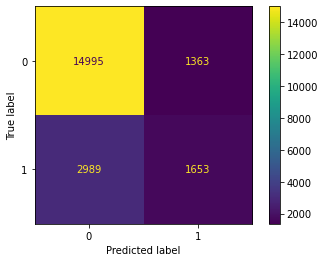

In [123]:
# K - FOLD Cross Validation.

kfold = KFold(n_splits=5, random_state=100, shuffle=True)

xgb = XGBClassifier(learning_rate = 0.75, max_depth = 5)
results_kfold = cross_val_score(xgb, trainX, trainy.values.ravel(), cv=10)
print(results_kfold)
print("Accuracy of XGBOOST KFold with k=10: %.2f%%" % (results_kfold.mean()*100.0))


pred = cross_val_predict(xgb, trainX, trainy.values.ravel(), cv=5)
conf_mat = confusion_matrix(trainy, pred)
print(conf_mat)
disp = ConfusionMatrixDisplay.from_predictions(trainy,pred)

In [146]:
xgb = XGBClassifier(learning_rate = 0.01, max_depth = 5)
xgb.fit(trainX,trainy.values.ravel())
y_pred = xgb.predict(testX)

Confusion Matrix:
[[6689  317]
 [1281  713]]
------------------------------------
AUC Score: 0.6561628934763182
------------------------------------
Accuracy of XGBOOST: 82.24444444444444 %
------------------------------------
Recall: 0.3575727181544634
------------------------------------
Precision: 0.6922330097087379
------------------------------------
Specificity: 0.954753068798173
------------------------------------
Sensitivity: 0.3575727181544634
------------------------------------
Miss Rate (False Positive Rate): 0.045246931201827004
------------------------------------
Miss Rate (False Negative Rate): 0.6424272818455367


Text(0.5, 1.0, 'Contribution of features in Model Performance')

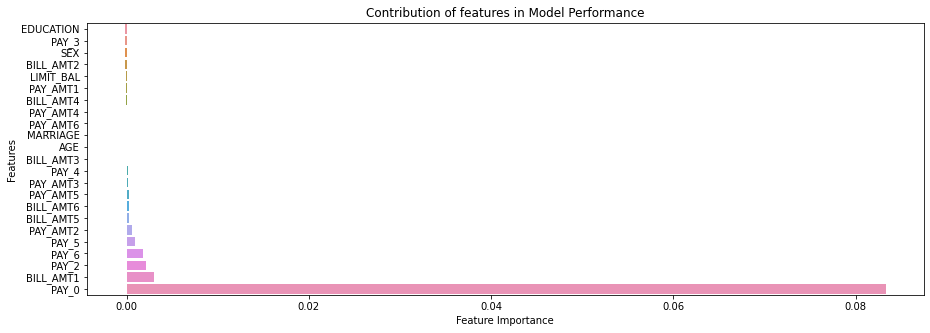

In [147]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testy,y_pred)
print("Confusion Matrix:")
print(cm)
print('------------------------------------')

AUC_Score = roc_auc_score(testy,y_pred)
print("AUC Score:",AUC_Score)
print('------------------------------------')


accuracy = xgb.score(testX, testy)
print("Accuracy of XGBOOST:",accuracy*100,"%")
print('------------------------------------')


from sklearn.metrics import recall_score
recall = recall_score(testy,y_pred)
print("Recall:",recall)
print('------------------------------------')

from sklearn.metrics import precision_score
precision = precision_score(testy,y_pred)
print("Precision:",precision)
print('------------------------------------')

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Specificity:", specificity)
print('------------------------------------')

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print("Sensitivity:", sensitivity)

print('------------------------------------')
miss_rate = cm[0,1]/(cm[0,1]+cm[0,0])
print("Miss Rate (False Positive Rate):", miss_rate)

print('------------------------------------')
miss_rate_FNR = cm[1,0]/(cm[1,0]+cm[1,1])
print("Miss Rate (False Negative Rate):", miss_rate_FNR)


perm_importance = permutation_importance(xgb, testX, testy)

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(15,5))
sns.barplot(y = features[sorted_idx], x = perm_importance.importances_mean[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Contribution of features in Model Performance")

### Gradient Boosting Classifier

[0.82714286 0.81904762 0.83238095 0.82047619 0.81761905 0.80904762
 0.81428571 0.81666667 0.82238095 0.81285714]
Accuracy of Gradient Boosting KFold with k=10: 81.92%
[[15582   776]
 [ 3008  1634]]


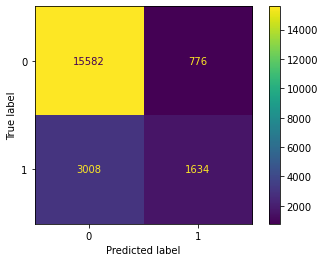

In [251]:
# K - FOLD Cross Validation.

kfold = KFold(n_splits=5, random_state=100, shuffle=True)

gb = GradientBoostingClassifier(learning_rate=0.01, max_depth=5, n_estimators=400)
results_kfold = cross_val_score(gb, trainX, trainy.values.ravel(), cv=10)
print(results_kfold)
print("Accuracy of Gradient Boosting KFold with k=10: %.2f%%" % (results_kfold.mean()*100.0))


pred = cross_val_predict(gb, trainX, trainy.values.ravel(), cv=5)
conf_mat = confusion_matrix(trainy, pred)
print(conf_mat)
disp = ConfusionMatrixDisplay.from_predictions(trainy,pred)

In [254]:
gb = GradientBoostingClassifier(learning_rate=0.04, max_depth=4, n_estimators=250)
gb.fit(trainX,trainy.values.ravel())
y_pred = gb.predict(testX)

Confusion Matrix:
[[6658  348]
 [1260  734]]
------------------------------------
AUC Score: 0.6592163014879638
------------------------------------
Accuracy of Gradient Boosting: 82.13333333333334 %
------------------------------------
Recall: 0.36810431293881646
------------------------------------
Precision: 0.678373382624769
------------------------------------
Specificity: 0.9503282900371111
------------------------------------
Sensitivity: 0.36810431293881646
------------------------------------
Miss Rate (False Positive Rate): 0.04967170996288895
------------------------------------
Miss Rate (False Negative Rate): 0.6318956870611836
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7006
           1       0.68      0.37      0.48      1994

    accuracy                           0.82      9000
   macro avg       0.76      0.66      0.68      9000
weighted avg       0.80      0.82      0.80      9000



Text(0.5, 1.0, 'Contribution of features in Model Performance')

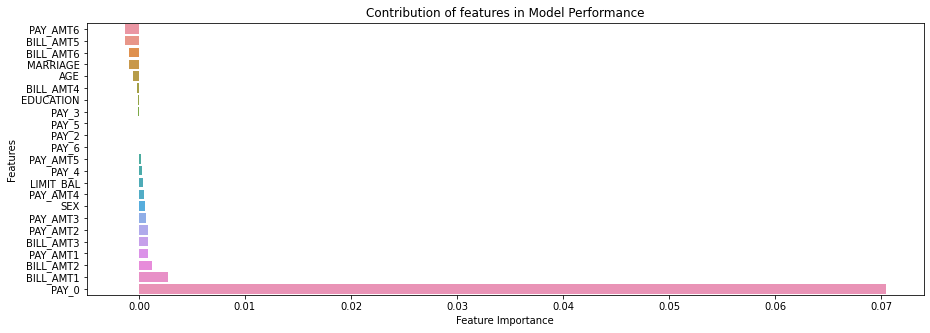

In [255]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testy,y_pred)
print("Confusion Matrix:")
print(cm)
print('------------------------------------')

AUC_Score = roc_auc_score(testy,y_pred)
print("AUC Score:",AUC_Score)
print('------------------------------------')


accuracy = gb.score(testX, testy)
print("Accuracy of Gradient Boosting:",accuracy*100,"%")
print('------------------------------------')


from sklearn.metrics import recall_score
recall = recall_score(testy,y_pred)
print("Recall:",recall)
print('------------------------------------')

from sklearn.metrics import precision_score
precision = precision_score(testy,y_pred)
print("Precision:",precision)
print('------------------------------------')

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Specificity:", specificity)
print('------------------------------------')

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print("Sensitivity:", sensitivity)

print('------------------------------------')
miss_rate = cm[0,1]/(cm[0,1]+cm[0,0])
print("Miss Rate (False Positive Rate):", miss_rate)

print('------------------------------------')
miss_rate_FNR = cm[1,0]/(cm[1,0]+cm[1,1])
print("Miss Rate (False Negative Rate):", miss_rate_FNR)

print(classification_report(testy,y_pred))

perm_importance = permutation_importance(gb, testX, testy)

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(15,5))
sns.barplot(y = features[sorted_idx], x = perm_importance.importances_mean[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Contribution of features in Model Performance")

In [157]:
gb_cv = GradientBoostingClassifier()
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 150, 200, 250, 300] 
}
grid_search = GridSearchCV(estimator = gb_cv, param_grid=param_grid, cv = 3, verbose = 2)
grid_search.fit(trainX, trainy.values.ravel())
best_grid = grid_search.best_estimator_
print(best_grid)

Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   5.6s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   5.6s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   5.6s
[CV] END ...............learning_rate=0.01, n_estimators=150; total time=   9.6s
[CV] END ...............learning_rate=0.01, n_estimators=150; total time=   8.0s
[CV] END ...............learning_rate=0.01, n_estimators=150; total time=   8.6s
[CV] END ...............learning_rate=0.01, n_estimators=200; total time=  10.8s
[CV] END ...............learning_rate=0.01, n_estimators=200; total time=  10.7s
[CV] END ...............learning_rate=0.01, n_estimators=200; total time=  10.7s
[CV] END ...............learning_rate=0.01, n_estimators=250; total time=  14.6s
[CV] END ...............learning_rate=0.01, n_estimators=250; total time=  13.5s
[CV] END ...............learning_rate=0.01, n_es

In [158]:
gb = GradientBoostingClassifier(learning_rate=0.01, n_estimators=150)
gb.fit(trainX,trainy.values.ravel())
y_pred = gb.predict(testX)

In [159]:
AUC_Score = roc_auc_score(testy,y_pred)
print("AUC Score:",AUC_Score)
print('------------------------------------')


accuracy = gb.score(testX, testy)
print("Accuracy of Gradient Boosting:",accuracy*100,"%")
print('------------------------------------')

AUC Score: 0.6423907749511738
------------------------------------
Accuracy of Gradient Boosting: 82.11111111111111 %
------------------------------------


### Voting Classifier (Ensemble Method)

In [245]:
r0 = GradientBoostingClassifier(learning_rate = 0.01,max_depth=4,n_estimators=250)
r1 = RandomForestClassifier(max_depth=10,n_estimators = 400)
r2 = XGBClassifier(learning_rate = 0.01, max_depth = 5)

# In soft voting, every individual classifier provides a probability value that a specific data point belongs to a particular target class
voting = VotingClassifier([('gb1', r0),('gb2', r1),('gb3', r2)], voting='soft')
voting.fit(trainX,trainy.values.ravel())
y_pred_voting = voting.predict(testX)

In [247]:
accuracy = voting.score(testX, testy)
print("Accuracy of Voting Classifier:",accuracy*100,"%")

Accuracy of Voting Classifier: 82.15555555555557 %


## Removing Multi - Colinear Features

In [65]:
X = data[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'BILL_AMT1', 'PAY_AMT1']]     # All columns except target variable.
y = data[['default.payment.next.month']]                          # Target Variable.

In [66]:
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3, random_state=2)
print(trainX.shape)
print(trainy.shape)
print(testX.shape)
print(testy.shape)

(21000, 8)
(21000, 1)
(9000, 8)
(9000, 1)


## Applying Machine Learning Models After Removing Multi Colinear Features.

In [26]:
# Random Forest Classifier
rf = RandomForestClassifier(max_depth=5,n_estimators = 200)
rf.fit(trainX, trainy)
y_pred_rf = rf.predict(testX)
rf_acc = accuracy_score(testy, y_pred_rf)
print("Random Forest Accuracy:", rf_acc)

# Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(trainX, trainy)
y_pred_dt = dt.predict(testX)
dt_acc = accuracy_score(testy, y_pred_dt)
print("Decision Tree Accuracy:", dt_acc)

# XGBoost Classifier
xgb = XGBClassifier(learning_rate = 0.01, max_depth = 5)
xgb.fit(trainX, trainy)
y_pred_xgb = xgb.predict(testX)
xgb_acc = accuracy_score(testy, y_pred_xgb)
print("XGBoost Accuracy:", xgb_acc)

# Gradient Boosting Classifier
gb = GradientBoostingClassifier(learning_rate=0.01, max_depth=4, n_estimators=250)
gb.fit(trainX, trainy)
y_pred_gb = gb.predict(testX)
gb_acc = accuracy_score(testy, y_pred_gb)
print("Gradient Boosting Accuracy:", gb_acc)

# KNN Classifier
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(trainX, trainy)
y_pred_knn = knn.predict(testX)
knn_acc = accuracy_score(testy, y_pred_knn)
print("KNN Accuracy:", knn_acc)

Random Forest Accuracy: 0.8216666666666667
Decision Tree Accuracy: 0.7177777777777777
XGBoost Accuracy: 0.8203333333333334
Gradient Boosting Accuracy: 0.8197777777777778
KNN Accuracy: 0.7707777777777778


### Hyper Parameter Tuning of Models

In [263]:
# Random Forest Classifier
rf = RandomForestClassifier(max_depth=9,n_estimators = 1500)
rf.fit(trainX, trainy)
y_pred_rf = rf.predict(testX)
rf_acc = accuracy_score(testy, y_pred_rf)
print("Random Forest Accuracy:", rf_acc)

Random Forest Accuracy: 0.8215555555555556


### Grid Search Cross Validation 

In [264]:
gb_cv = RandomForestClassifier()
param_grid = {
    'max_depth': [2, 5, 10, 20],
    'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450,550,800,1000,1200] 
}
grid_search = GridSearchCV(estimator = gb_cv, param_grid=param_grid, cv = 3, verbose = 2)
grid_search.fit(trainX, trainy.values.ravel())
best_grid = grid_search.best_estimator_
print(best_grid)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] END ......................max_depth=2, n_estimators=100; total time=   0.5s
[CV] END ......................max_depth=2, n_estimators=100; total time=   0.5s
[CV] END ......................max_depth=2, n_estimators=100; total time=   0.5s
[CV] END ......................max_depth=2, n_estimators=150; total time=   0.7s
[CV] END ......................max_depth=2, n_estimators=150; total time=   1.0s
[CV] END ......................max_depth=2, n_estimators=150; total time=   1.0s
[CV] END ......................max_depth=2, n_estimators=200; total time=   1.0s
[CV] END ......................max_depth=2, n_estimators=200; total time=   1.1s
[CV] END ......................max_depth=2, n_estimators=200; total time=   1.1s
[CV] END ......................max_depth=2, n_estimators=250; total time=   2.8s
[CV] END ......................max_depth=2, n_estimators=250; total time=   2.8s
[CV] END ......................max_depth=2, n_e

In [265]:
# Random Forest Classifier
rf = RandomForestClassifier(max_depth=10,n_estimators = 1000)
rf.fit(trainX, trainy)
y_pred_rf = rf.predict(testX)
rf_acc = accuracy_score(testy, y_pred_rf)
print("Random Forest Accuracy:", rf_acc)

Random Forest Accuracy: 0.8213333333333334


In [74]:
# Hyper Parameter Tuning of Gradient Boosting Classifier
gb = GradientBoostingClassifier(learning_rate=0.02, max_depth=5, n_estimators=100)
gb.fit(trainX, trainy)
y_pred_gb = gb.predict(testX)
gb_acc = accuracy_score(testy, y_pred_gb)
print("Gradient Boosting Accuracy:", gb_acc)

Gradient Boosting Accuracy: 0.8207777777777778


In [98]:
# Hyper Parameter Tuning of XGBoost Classifier
xgb = XGBClassifier(learning_rate = 0.04, max_depth = 4)
xgb.fit(trainX, trainy)
y_pred_xgb = xgb.predict(testX)
xgb_acc = accuracy_score(testy, y_pred_xgb)
print("XGBoost Accuracy:", xgb_acc)

XGBoost Accuracy: 0.8211111111111111


In [116]:
# Decision Tree Classifier
dt = DecisionTreeClassifier(max_depth=2, max_features='auto')
dt.fit(trainX, trainy)
y_pred_dt = dt.predict(testX)
dt_acc = accuracy_score(testy, y_pred_dt)
print("Decision Tree Accuracy:", dt_acc*100)

Decision Tree Accuracy: 82.04444444444444


In [128]:
# KNN Classifier
knn = KNeighborsClassifier(n_neighbors=45)
knn.fit(trainX, trainy)
y_pred_knn = knn.predict(testX)
knn_acc = accuracy_score(testy, y_pred_knn)
print("KNN Accuracy:", knn_acc* 100)

KNN Accuracy: 77.8111111111111


### Voting Classifier

In [67]:
r0 = GradientBoostingClassifier(learning_rate=0.02, max_depth=6, n_estimators=150)
r1 = RandomForestClassifier(max_depth=12,n_estimators = 147)
r2 = XGBClassifier(learning_rate = 0.014, max_depth = 5)
r3 = DecisionTreeClassifier(max_depth=8, max_features='auto')

# In soft voting, every individual classifier provides a probability value that a specific data point belongs to a particular target class
voting = VotingClassifier([('gb1', r0),('gb2', r1),('gb3', r2),('gb4', r3)], voting='soft')
voting.fit(trainX,trainy.values.ravel())
y_pred_voting = voting.predict(testX)

In [68]:
accuracy = voting.score(testX, testy)
print("Accuracy of Voting Classifier:",accuracy*100,"%")

Accuracy of Voting Classifier: 82.02222222222221 %


## Feature Selection Using RF-RFS

In [162]:
rf_w = RandomForestClassifier(random_state=100, n_estimators=50)
rf_w.fit(trainX, trainy)

RandomForestClassifier(n_estimators=50, random_state=100)

<AxesSubplot:xlabel='Features', ylabel='Importances'>

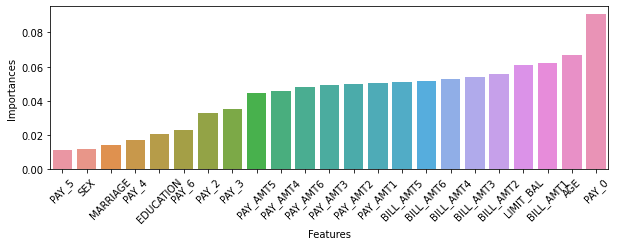

In [163]:
import seaborn as sns
# get the importance of the resulting features.
importances = rf_w.feature_importances_
# create a data frame for visualization.
final_df = pd.DataFrame({"Features": trainX.columns, "Importances":importances})
final_df.set_index('Importances')

# sort in ascending order to better visualization.
final_df = final_df.sort_values('Importances')

# plot the feature importances in bars.
plt.figure(figsize=(10,3))
plt.xticks(rotation=45)
sns.barplot(x="Features",y= "Importances", data=final_df)

In [164]:
model_tree = RandomForestClassifier(n_estimators=100,random_state=42)

# use RFE to eleminate the less importance features
sel_rfe_tree = RFE(estimator=model_tree, n_features_to_select=14, step=1)    # Selecting 14 imporatant Features.
X_train_rfe_tree = sel_rfe_tree.fit_transform(trainX, trainy)
print(sel_rfe_tree.get_support())
print(sel_rfe_tree.ranking_)

[ True False False False  True  True False False False False False  True
  True  True  True  True  True  True  True  True  True False  True]
[ 1 10  7  9  1  1  2  5  6  8  4  1  1  1  1  1  1  1  1  1  1  3  1]


In [165]:
# These are the important features after RFE.
selected_cols = [column for column in trainX.columns if column in trainX.columns[sel_rfe_tree.get_support()]]
selected_cols

['LIMIT_BAL',
 'AGE',
 'PAY_0',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT6']

## Applying Machine Learning Models after RF - SFE

In [69]:
#Adding all imporatant features after RFE in X variable.
X = data[['LIMIT_BAL', 'AGE', 'PAY_0', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT6']]
y = data[['default.payment.next.month']]              # Target Variable.

### Train Test Splitting Dataset

In [70]:
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3, random_state=2)
print(trainX.shape)
print(trainy.shape)
print(testX.shape)
print(testy.shape)

(21000, 14)
(21000, 1)
(9000, 14)
(9000, 1)


In [131]:
features = trainX.columns
print(features)

Index(['LIMIT_BAL', 'AGE', 'PAY_0', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT6'],
      dtype='object')


## Applying Machine Leaning Models After Feature Selection Using RF-RFS

### Random Forest Classifier (RF - RFS)

In [132]:
rf = RandomForestClassifier(max_depth=12,n_estimators = 150)
rf.fit(trainX,trainy.values.ravel())
y_pred = rf.predict(testX)

Confusion Matrix:
[[6720  286]
 [1323  671]]
------------------------------------
AUC Score: 0.6478436880724961
------------------------------------
Accuracy of Random Forest: 82.12222222222222 %
------------------------------------
Recall: 0.3365095285857573
------------------------------------
Precision: 0.7011494252873564
------------------------------------
Specificity: 0.959177847559235
------------------------------------
Sensitivity: 0.3365095285857573
------------------------------------
Miss Rate (False Positive Rate): 0.04082215244076506
------------------------------------
Miss Rate (False Negative Rate): 0.6634904714142428


Text(0.5, 1.0, 'Contribution of features in Model Performance')

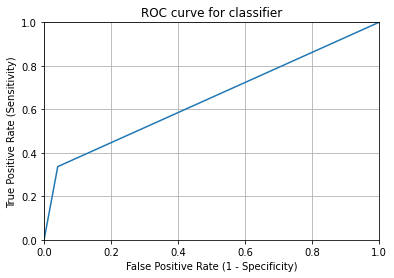

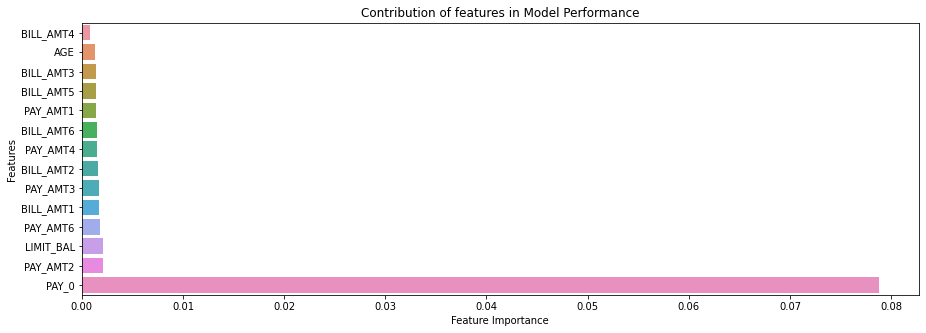

In [180]:
cm = confusion_matrix(testy,y_pred)
print("Confusion Matrix:")
print(cm)
print('------------------------------------')

AUC_Score = roc_auc_score(testy,y_pred)
print("AUC Score:",AUC_Score)
print('------------------------------------')


accuracy = rf.score(testX, testy)
print("Accuracy of Random Forest:",accuracy*100,"%")
print('------------------------------------')


from sklearn.metrics import recall_score
recall = recall_score(testy,y_pred)
print("Recall:",recall)
print('------------------------------------')

from sklearn.metrics import precision_score
precision = precision_score(testy,y_pred)
print("Precision:",precision)
print('------------------------------------')

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Specificity:", specificity)
print('------------------------------------')

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print("Sensitivity:", sensitivity)

print('------------------------------------')
miss_rate = cm[0,1]/(cm[0,1]+cm[0,0])
print("Miss Rate (False Positive Rate):", miss_rate)

print('------------------------------------')
miss_rate_FNR = cm[1,0]/(cm[1,0]+cm[1,1])
print("Miss Rate (False Negative Rate):", miss_rate_FNR)


miss_rate, sensitivity, thresholds = metrics.roc_curve(testy, y_pred)
plt.plot(miss_rate, sensitivity)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

perm_importance = permutation_importance(rf, testX, testy)

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(15,5))
sns.barplot(y = features[sorted_idx], x = perm_importance.importances_mean[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Contribution of features in Model Performance")

#### Hyperparamter Tuning of Random Forest Model

In [143]:
# Random Forest Classifier
rf = RandomForestClassifier(max_depth=8,n_estimators = 80)
rf.fit(trainX, trainy)
y_pred_rf = rf.predict(testX)
rf_acc = accuracy_score(testy, y_pred_rf)
print("Random Forest Accuracy:", rf_acc)

Random Forest Accuracy: 0.8205555555555556


### XGBoost Classifier (After RFS)

In [184]:
xgb = XGBClassifier(learning_rate = 0.03, max_depth = 6)
xgb.fit(trainX,trainy.values.ravel())
y_pred = xgb.predict(testX)

Confusion Matrix:
[[6719  287]
 [1325  669]]
------------------------------------
AUC Score: 0.6472708161595836
------------------------------------
Accuracy of XGBOOST: 82.08888888888889 %
------------------------------------
Recall: 0.33550651955867605
------------------------------------
Precision: 0.6997907949790795
------------------------------------
Specificity: 0.959035112760491
------------------------------------
Sensitivity: 0.33550651955867605
------------------------------------
Miss Rate (False Positive Rate): 0.040964887239508994
------------------------------------
Miss Rate (False Negative Rate): 0.664493480441324


Text(0.5, 1.0, 'Contribution of features in Model Performance')

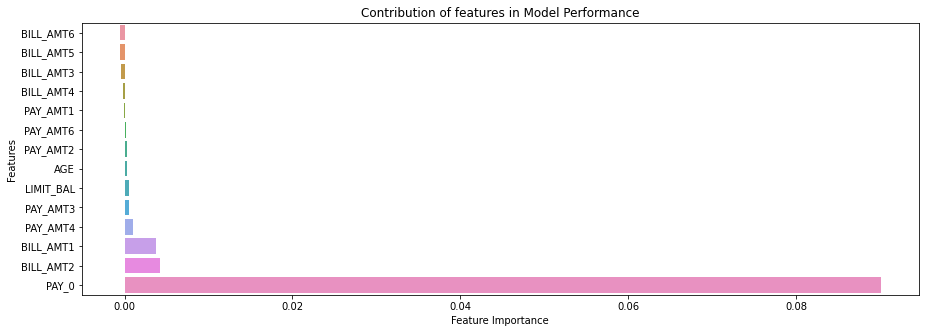

In [185]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testy,y_pred)
print("Confusion Matrix:")
print(cm)
print('------------------------------------')

AUC_Score = roc_auc_score(testy,y_pred)
print("AUC Score:",AUC_Score)
print('------------------------------------')


accuracy = xgb.score(testX, testy)
print("Accuracy of XGBOOST:",accuracy*100,"%")
print('------------------------------------')


from sklearn.metrics import recall_score
recall = recall_score(testy,y_pred)
print("Recall:",recall)
print('------------------------------------')

from sklearn.metrics import precision_score
precision = precision_score(testy,y_pred)
print("Precision:",precision)
print('------------------------------------')

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Specificity:", specificity)
print('------------------------------------')

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print("Sensitivity:", sensitivity)

print('------------------------------------')
miss_rate = cm[0,1]/(cm[0,1]+cm[0,0])
print("Miss Rate (False Positive Rate):", miss_rate)

print('------------------------------------')
miss_rate_FNR = cm[1,0]/(cm[1,0]+cm[1,1])
print("Miss Rate (False Negative Rate):", miss_rate_FNR)


perm_importance = permutation_importance(xgb, testX, testy)

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(15,5))
sns.barplot(y = features[sorted_idx], x = perm_importance.importances_mean[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Contribution of features in Model Performance")

#### Hyperparamter Tuning of XGBoost Model

In [155]:
# Hyper Parameter Tuning of XGBoost Classifier
xgb = XGBClassifier(learning_rate = 0.09, max_depth = 8)
xgb.fit(trainX, trainy)
y_pred_xgb = xgb.predict(testX)
xgb_acc = accuracy_score(testy, y_pred_xgb)
print("XGBoost Accuracy:", xgb_acc)

XGBoost Accuracy: 0.8223333333333334


In [161]:
# Hyper Parameter Tuning of XGBoost Classifier
xgb = XGBClassifier(learning_rate = 0.09, ma_depth = 4)
xgb.fit(trainX, trainy)
y_pred_xgb = xgb.predict(testX)
xgb_acc = accuracy_score(testy, y_pred_xgb)
print("XGBoost Accuracy:", xgb_acc* 100)

XGBoost Accuracy: 82.26666666666667


### Decision Tree Classifier (After RFS)

In [162]:
DT = DecisionTreeClassifier(max_depth=150 , max_features= 'auto')
DT.fit(trainX,trainy)
y_pred = DT.predict(testX) 

Confusion Matrix:
[[5677 1329]
 [1175  819]]
------------------------------------
AUC Score: 0.6105188245295406
------------------------------------
Accuracy of Decision Tree: 72.17777777777778 %
------------------------------------
Recall: 0.4107321965897693
------------------------------------
Precision: 0.3812849162011173
------------------------------------
Specificity: 0.8103054524693121
------------------------------------
Sensitivity: 0.4107321965897693
------------------------------------
Miss Rate (False Positive Rate): 0.18969454753068798
------------------------------------
Miss Rate (False Negative Rate): 0.5892678034102307


Text(0.5, 1.0, 'Contribution of features in Model Performance')

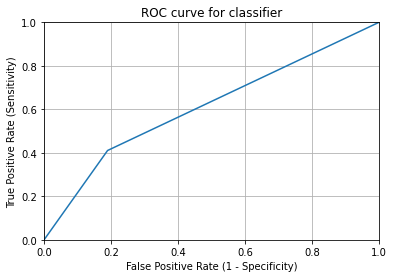

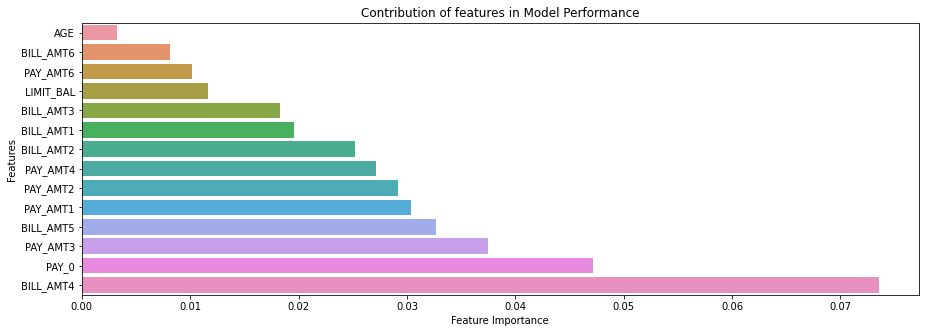

In [163]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testy,y_pred)
print("Confusion Matrix:")
print(cm)
print('------------------------------------')

AUC_Score = roc_auc_score(testy,y_pred)
print("AUC Score:",AUC_Score)
print('------------------------------------')


accuracy = DT.score(testX, testy)
print("Accuracy of Decision Tree:",accuracy*100,"%")
print('------------------------------------')


from sklearn.metrics import recall_score
recall = recall_score(testy,y_pred)
print("Recall:",recall)
print('------------------------------------')

from sklearn.metrics import precision_score
precision = precision_score(testy,y_pred)
print("Precision:",precision)
print('------------------------------------')

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Specificity:", specificity)
print('------------------------------------')

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print("Sensitivity:", sensitivity)

print('------------------------------------')
miss_rate = cm[0,1]/(cm[0,1]+cm[0,0])
print("Miss Rate (False Positive Rate):", miss_rate)

print('------------------------------------')
miss_rate_FNR = cm[1,0]/(cm[1,0]+cm[1,1])
print("Miss Rate (False Negative Rate):", miss_rate_FNR)

from sklearn import metrics
miss_rate, sensitivity, thresholds = metrics.roc_curve(testy, y_pred)
plt.plot(miss_rate, sensitivity)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

perm_importance = permutation_importance(DT, testX, testy)

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(15,5))
sns.barplot(y = features[sorted_idx], x = perm_importance.importances_mean[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Contribution of features in Model Performance")

#### Hyperparamter Tuning of Decision Tree Model

In [180]:
# Decision Tree Classifier
dt = DecisionTreeClassifier(max_depth=4, max_features='auto')
dt.fit(trainX, trainy)
y_pred_dt = dt.predict(testX)
dt_acc = accuracy_score(testy, y_pred_dt)
print("Decision Tree Accuracy:", dt_acc*100)

Decision Tree Accuracy: 82.05555555555556


### KNN Classifier (After RFS)

In [71]:
# KNN Classifier
knn = KNeighborsClassifier(n_neighbors=45)
knn.fit(trainX, trainy)
y_pred_knn = knn.predict(testX)
knn_acc = accuracy_score(testy, y_pred_knn)
print("KNN Accuracy:", knn_acc* 100)


KNN Accuracy: 77.94444444444444


### Gradient Boosting Classifier (After RFS)

In [186]:
gb = GradientBoostingClassifier(learning_rate=0.01, max_depth=4, n_estimators=250)
gb.fit(trainX,trainy.values.ravel())
y_pred = gb.predict(testX)

Confusion Matrix:
[[6739  267]
 [1353  641]]
------------------------------------
AUC Score: 0.6416771009574541
------------------------------------
Accuracy of Gradient Boosting: 82.0 %
------------------------------------
Recall: 0.3214643931795386
------------------------------------
Precision: 0.7059471365638766
------------------------------------
Specificity: 0.9618898087353697
------------------------------------
Sensitivity: 0.3214643931795386
------------------------------------
Miss Rate (False Positive Rate): 0.03811019126463032
------------------------------------
Miss Rate (False Negative Rate): 0.6785356068204614
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      7006
           1       0.71      0.32      0.44      1994

    accuracy                           0.82      9000
   macro avg       0.77      0.64      0.67      9000
weighted avg       0.80      0.82      0.79      9000



Text(0.5, 1.0, 'Contribution of features in Model Performance')

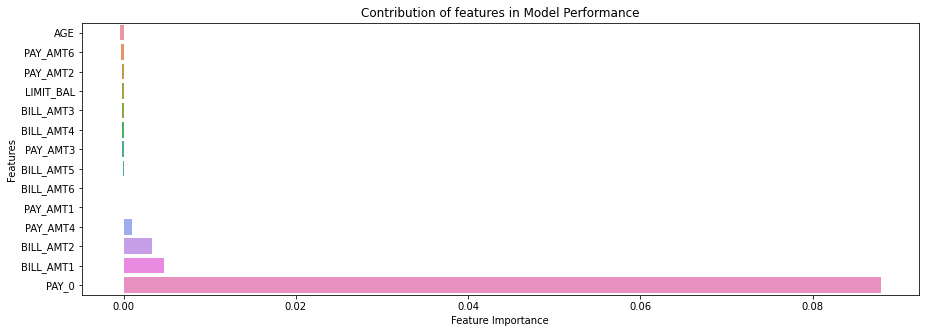

In [187]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testy,y_pred)
print("Confusion Matrix:")
print(cm)
print('------------------------------------')

AUC_Score = roc_auc_score(testy,y_pred)
print("AUC Score:",AUC_Score)
print('------------------------------------')


accuracy = gb.score(testX, testy)
print("Accuracy of Gradient Boosting:",accuracy*100,"%")
print('------------------------------------')


from sklearn.metrics import recall_score
recall = recall_score(testy,y_pred)
print("Recall:",recall)
print('------------------------------------')

from sklearn.metrics import precision_score
precision = precision_score(testy,y_pred)
print("Precision:",precision)
print('------------------------------------')

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Specificity:", specificity)
print('------------------------------------')

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print("Sensitivity:", sensitivity)

print('------------------------------------')
miss_rate = cm[0,1]/(cm[0,1]+cm[0,0])
print("Miss Rate (False Positive Rate):", miss_rate)

print('------------------------------------')
miss_rate_FNR = cm[1,0]/(cm[1,0]+cm[1,1])
print("Miss Rate (False Negative Rate):", miss_rate_FNR)

print(classification_report(testy,y_pred))

perm_importance = permutation_importance(gb, testX, testy)

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(15,5))
sns.barplot(y = features[sorted_idx], x = perm_importance.importances_mean[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Contribution of features in Model Performance")

#### Hyperparamter Tuning of Gradient Boosting Model

In [182]:
# Hyper Parameter Tuning of Gradient Boosting Classifier
gb = GradientBoostingClassifier(learning_rate=0.02, max_depth=4, n_estimators=100)
gb.fit(trainX, trainy)
y_pred_gb = gb.predict(testX)
gb_acc = accuracy_score(testy, y_pred_gb)
print("Gradient Boosting Accuracy:", gb_acc)

Gradient Boosting Accuracy: 0.8201111111111111


In [183]:
# Hyper Parameter Tuning of Gradient Boosting Classifier
gb = GradientBoostingClassifier(learning_rate=0.02, max_depth=6, n_estimators=150)
gb.fit(trainX, trainy)
y_pred_gb = gb.predict(testX)
gb_acc = accuracy_score(testy, y_pred_gb)
print("Gradient Boosting Accuracy:", gb_acc)

Gradient Boosting Accuracy: 0.8214444444444444


In [191]:
# Hyper Parameter Tuning of Gradient Boosting Classifier
gb = GradientBoostingClassifier(learning_rate=0.05, max_depth=8, n_estimators=225)
gb.fit(trainX, trainy)
y_pred_gb = gb.predict(testX)
gb_acc = accuracy_score(testy, y_pred_gb)
print("Gradient Boosting Accuracy:", gb_acc)

Gradient Boosting Accuracy: 0.8154444444444444


### Voting Classifier (After RFS)

In [196]:
r0 = GradientBoostingClassifier(learning_rate = 0.01,max_depth=4,n_estimators=250)
r1 = RandomForestClassifier(max_depth=12,n_estimators = 150)
r2 = XGBClassifier(learning_rate = 0.03, max_depth = 6)

# In soft voting, every individual classifier provides a probability value that a specific data point belongs to a particular target class
voting = VotingClassifier([('gb1', r0),('gb2', r1),('gb3', r2)], voting='soft')
voting.fit(trainX,trainy.values.ravel())
y_pred_voting = voting.predict(testX)

Confusion Matrix:
[[6732  274]
 [1336  658]]
------------------------------------
AUC Score: 0.6454403175269458
------------------------------------
Accuracy of Voting Classifier: 82.11111111111111 %
------------------------------------
Recall: 0.3299899699097292
------------------------------------
Precision: 0.7060085836909872
------------------------------------
Specificity: 0.9608906651441621
------------------------------------
Sensitivity: 0.3299899699097292
------------------------------------
Miss Rate (False Positive Rate): 0.039109334855837855
------------------------------------
Miss Rate (False Negative Rate): 0.6700100300902708
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      7006
           1       0.39      0.42      0.41      1994

    accuracy                           0.73      9000
   macro avg       0.61      0.62      0.62      9000
weighted avg       0.73      0.73      0.73      9000



Text(0.5, 1.0, 'Contribution of features in Model Performance')

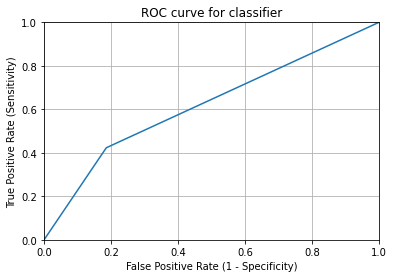

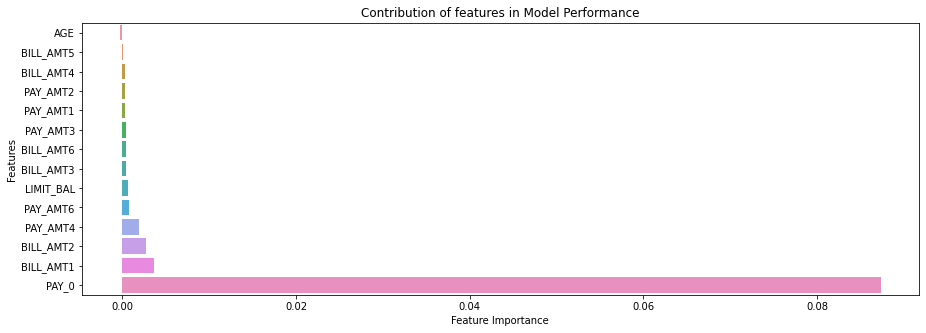

In [197]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testy,y_pred_voting)
print("Confusion Matrix:")
print(cm)
print('------------------------------------')

AUC_Score = roc_auc_score(testy,y_pred_voting)
print("AUC Score:",AUC_Score)
print('------------------------------------')


accuracy = voting.score(testX, testy)
print("Accuracy of Voting Classifier:",accuracy*100,"%")
print('------------------------------------')


from sklearn.metrics import recall_score
recall = recall_score(testy,y_pred_voting)
print("Recall:",recall)
print('------------------------------------')

from sklearn.metrics import precision_score
precision = precision_score(testy,y_pred_voting)
print("Precision:",precision)
print('------------------------------------')

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Specificity:", specificity)
print('------------------------------------')

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print("Sensitivity:", sensitivity)

print('------------------------------------')
miss_rate = cm[0,1]/(cm[0,1]+cm[0,0])
print("Miss Rate (False Positive Rate):", miss_rate)

print('------------------------------------')
miss_rate_FNR = cm[1,0]/(cm[1,0]+cm[1,1])
print("Miss Rate (False Negative Rate):", miss_rate_FNR)

print(classification_report(testy,y_pred))
miss_rate, sensitivity, thresholds = metrics.roc_curve(testy, y_pred)
plt.plot(miss_rate, sensitivity)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)


perm_importance = permutation_importance(voting, testX, testy)

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(15,5))
sns.barplot(y = features[sorted_idx], x = perm_importance.importances_mean[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Contribution of features in Model Performance")

In [194]:
r0 = GradientBoostingClassifier(learning_rate=0.02, max_depth=6, n_estimators=150)
r1 = RandomForestClassifier(max_depth=12,n_estimators = 150)
r2 = XGBClassifier(learning_rate = 0.09, max_depth = 4)
r3 = DecisionTreeClassifier(max_depth=4, max_features='auto')

# In soft voting, every individual classifier provides a probability value that a specific data point belongs to a particular target class
voting = VotingClassifier([('gb1', r0),('gb2', r1),('gb3', r2),('gb4', r3)], voting='soft')
voting.fit(trainX,trainy.values.ravel())
y_pred_voting = voting.predict(testX)

In [195]:
accuracy = voting.score(testX, testy)
print("Accuracy of Voting Classifier:",accuracy*100,"%")

Accuracy of Voting Classifier: 82.03333333333333 %
------------------------------------


In [197]:
r0 = GradientBoostingClassifier(learning_rate=0.06, max_depth=7, n_estimators=150)
r1 = RandomForestClassifier(max_depth=12,n_estimators = 120)
r2 = XGBClassifier(learning_rate = 0.07, max_depth = 7)
r3 = DecisionTreeClassifier(max_depth=8, max_features='auto')

# In soft voting, every individual classifier provides a probability value that a specific data point belongs to a particular target class
voting = VotingClassifier([('gb1', r0),('gb2', r1),('gb3', r2),('gb4', r3)], voting='soft')
voting.fit(trainX,trainy.values.ravel())
y_pred_voting = voting.predict(testX)

In [198]:
accuracy = voting.score(testX, testy)
print("Accuracy of Voting Classifier:",accuracy*100,"%")

Accuracy of Voting Classifier: 82.0111111111111 %


## Feature Selection Using Lasso Regularization

In [198]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [199]:
X = data.loc[:, data.columns != 'default.payment.next.month']     # All columns except target variable.
y = data[['default.payment.next.month']]                          # Target Variable.

In [200]:
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3, random_state=2)
print(trainX.shape)
print(trainy.shape)
print(testX.shape)
print(testy.shape)

(21000, 23)
(21000, 1)
(9000, 23)
(9000, 1)


In [201]:
# apply the Lasso Model on this Dataset
lasso = Lasso(alpha=0.1)
lasso.fit(trainX,trainy)

Lasso(alpha=0.1)

In [204]:
features = trainX.columns
print(features)

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')


In [202]:
coeff = lasso.coef_
coeff

array([-3.79085909e-07, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        6.18301841e-05,  5.58917340e-02,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -4.42671829e-07,
        4.05465980e-07, -5.29279758e-08, -4.38872983e-08,  1.07059842e-07,
        3.69902490e-07, -1.15833055e-06, -9.03468581e-08, -2.19027230e-07,
       -5.61345857e-07, -5.53642704e-07, -1.85586095e-07])

In [205]:
df_coeff = pd.DataFrame({"features":features,"coeff":coeff})
df_coeff.sort_values("coeff")

,features,coeff
17,PAY_AMT1,-1.158331e-06
20,PAY_AMT4,-5.613459e-07
21,PAY_AMT5,-5.536427e-07
11,BILL_AMT1,-4.426718e-07
0,LIMIT_BAL,-3.790859e-07
19,PAY_AMT3,-2.190272e-07
22,PAY_AMT6,-1.855861e-07
18,PAY_AMT2,-9.034686e-08
13,BILL_AMT3,-5.292798e-08
14,BILL_AMT4,-4.388730e-08


In [208]:
X = data[['PAY_0','AGE','BILL_AMT2','BILL_AMT6','BILL_AMT5','BILL_AMT4','BILL_AMT3','PAY_AMT2','PAY_AMT6', 'PAY_AMT3','LIMIT_BAL','BILL_AMT1', 'PAY_AMT5','PAY_AMT4','PAY_AMT1']]     # All columns except target variable.
y = data[['default.payment.next.month']]                          # Target Variable.

In [209]:
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3, random_state=2)
print(trainX.shape)
print(trainy.shape)
print(testX.shape)
print(testy.shape)

(21000, 15)
(21000, 1)
(9000, 15)
(9000, 1)


## Applying Machine Learning Model after Lasso Feature Selection

In [223]:
# Random Forest Classifier
rf = RandomForestClassifier(max_depth=10,n_estimators = 400)
rf.fit(trainX, trainy)
y_pred_rf = rf.predict(testX)
rf_acc = accuracy_score(testy, y_pred_rf)
print("Random Forest Accuracy:", rf_acc)

# Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(trainX, trainy)
y_pred_dt = dt.predict(testX)
dt_acc = accuracy_score(testy, y_pred_dt)
print("Decision Tree Accuracy:", dt_acc)

# XGBoost Classifier
xgb = XGBClassifier(learning_rate = 0.01, max_depth = 5)
xgb.fit(trainX, trainy)
y_pred_xgb = xgb.predict(testX)
xgb_acc = accuracy_score(testy, y_pred_xgb)
print("XGBoost Accuracy:", xgb_acc)

# Gradient Boosting Classifier
gb = GradientBoostingClassifier(learning_rate=0.01, max_depth=4, n_estimators=250)
gb.fit(trainX, trainy)
y_pred_gb = gb.predict(testX)
gb_acc = accuracy_score(testy, y_pred_gb)
print("Gradient Boosting Accuracy:", gb_acc)

# KNN Classifier
knn = KNeighborsClassifier(n_neighbors=45)
knn.fit(trainX, trainy)
y_pred_knn = knn.predict(testX)
knn_acc = accuracy_score(testy, y_pred_knn)
print("KNN Accuracy:", knn_acc* 100)


Random Forest Accuracy: 0.821
Decision Tree Accuracy: 0.7202222222222222
XGBoost Accuracy: 0.8198888888888889
Gradient Boosting Accuracy: 0.82
KNN Accuracy: 77.94444444444444


### Hyper Parameter Tuning of Models

In [203]:
# Hyperparameter Tuning of Random Forest Classifier
rf = RandomForestClassifier(max_depth=12,n_estimators = 147)
rf.fit(trainX, trainy)
y_pred_rf = rf.predict(testX)
rf_acc = accuracy_score(testy, y_pred_rf)
print("Random Forest Accuracy:", rf_acc)

Random Forest Accuracy: 0.8217777777777778


In [205]:
# Hyperparameter tuning of Decision Tree Classifier
dt = DecisionTreeClassifier(max_depth=8, max_features='auto')
dt.fit(trainX, trainy)
y_pred_dt = dt.predict(testX)
dt_acc = accuracy_score(testy, y_pred_dt)
print("Decision Tree Accuracy:", dt_acc)

Decision Tree Accuracy: 0.8112222222222222


In [206]:
# Hyperparamter Tuning of XGBoost Classifier
xgb = XGBClassifier(learning_rate = 0.01, max_depth = 8)
xgb.fit(trainX, trainy)
y_pred_xgb = xgb.predict(testX)
xgb_acc = accuracy_score(testy, y_pred_xgb)
print("XGBoost Accuracy:", xgb_acc)

XGBoost Accuracy: 0.8205555555555556


In [207]:
# XGBoost Classifier
xgb = XGBClassifier(learning_rate = 0.03, max_depth = 8)
xgb.fit(trainX, trainy)
y_pred_xgb = xgb.predict(testX)
xgb_acc = accuracy_score(testy, y_pred_xgb)
print("XGBoost Accuracy:", xgb_acc)

XGBoost Accuracy: 0.8208888888888889


In [217]:
# Hyperparamter Tuning of XGBoost Classifier
xgb = XGBClassifier(learning_rate = 0.07, max_depth = 7)
xgb.fit(trainX, trainy)
y_pred_xgb = xgb.predict(testX)
xgb_acc = accuracy_score(testy, y_pred_xgb)
print("XGBoost Accuracy:", xgb_acc)

XGBoost Accuracy: 0.8225555555555556


In [218]:
# Gradient Boosting Classifier
gb = GradientBoostingClassifier(learning_rate=0.02, max_depth=6, n_estimators=150)
gb.fit(trainX, trainy)
y_pred_gb = gb.predict(testX)
gb_acc = accuracy_score(testy, y_pred_gb)
print("Gradient Boosting Accuracy:", gb_acc)

Gradient Boosting Accuracy: 0.8221111111111111


In [222]:
# Gradient Boosting Classifier
gb = GradientBoostingClassifier(learning_rate=0.03, max_depth=6, n_estimators=150)
gb.fit(trainX, trainy)
y_pred_gb = gb.predict(testX)
gb_acc = accuracy_score(testy, y_pred_gb)
print("Gradient Boosting Accuracy:", gb_acc)

Gradient Boosting Accuracy: 0.8216666666666667


### Voting Classifier (After Lasso)

In [214]:
r0 = GradientBoostingClassifier(learning_rate = 0.01,max_depth=4,n_estimators=250)
r1 = RandomForestClassifier(max_depth=12,n_estimators = 150)
r2 = XGBClassifier(learning_rate = 0.03, max_depth = 6)

# In soft voting, every individual classifier provides a probability value that a specific data point belongs to a particular target class
voting = VotingClassifier([('gb1', r0),('gb2', r1),('gb3', r2)], voting='soft')
voting.fit(trainX,trainy.values.ravel())
y_pred_voting = voting.predict(testX)

In [215]:
AUC_Score = roc_auc_score(testy,y_pred_voting)
print("AUC Score:",AUC_Score)
print('------------------------------------')


accuracy = voting.score(testX, testy)
print("Accuracy of Voting Classifier:",accuracy*100,"%")
print('------------------------------------')

AUC Score: 0.6446514106979804
------------------------------------
Accuracy of Voting Classifier: 82.1 %
------------------------------------


In [224]:
r0 = GradientBoostingClassifier(learning_rate=0.02, max_depth=6, n_estimators=150)
r1 = RandomForestClassifier(max_depth=12,n_estimators = 147)
r2 = XGBClassifier(learning_rate = 0.07, max_depth = 7)
r3 = DecisionTreeClassifier(max_depth=8, max_features='auto')

# In soft voting, every individual classifier provides a probability value that a specific data point belongs to a particular target class
voting = VotingClassifier([('gb1', r0),('gb2', r1),('gb3', r2),('gb4', r3)], voting='soft')
voting.fit(trainX,trainy.values.ravel())
y_pred_voting = voting.predict(testX)

In [225]:
accuracy = voting.score(testX, testy)
print("Accuracy of Voting Classifier:",accuracy*100,"%")

Accuracy of Voting Classifier: 82.06666666666666 %


## Feature Selection Using Information Gain Approach

In [227]:
X = data.loc[:, data.columns != 'default.payment.next.month']     # All columns except target variable.
y = data[['default.payment.next.month']]                          # Target Variable.

In [228]:
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3, random_state=2)
print(trainX.shape)
print(trainy.shape)
print(testX.shape)
print(testy.shape)

(21000, 23)
(21000, 1)
(9000, 23)
(9000, 1)


In [229]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(trainX, trainy.values.ravel())
mutual_info

array([0.01511821, 0.0054791 , 0.        , 0.00524344, 0.00118496,
       0.08037182, 0.04717507, 0.04054204, 0.03975984, 0.03195785,
       0.02954839, 0.00965993, 0.0084311 , 0.00851771, 0.00459782,
       0.00678313, 0.00472119, 0.02043965, 0.01895593, 0.01472826,
       0.01213302, 0.01462326, 0.01414164])

In [230]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = trainX.columns
mutual_info.sort_values(ascending=False)
# Checking Values of Mutual info with respect to features in sorted manner.

PAY_0        0.080372
PAY_2        0.047175
PAY_3        0.040542
PAY_4        0.039760
PAY_5        0.031958
PAY_6        0.029548
PAY_AMT1     0.020440
PAY_AMT2     0.018956
LIMIT_BAL    0.015118
PAY_AMT3     0.014728
PAY_AMT5     0.014623
PAY_AMT6     0.014142
PAY_AMT4     0.012133
BILL_AMT1    0.009660
BILL_AMT3    0.008518
BILL_AMT2    0.008431
BILL_AMT5    0.006783
SEX          0.005479
MARRIAGE     0.005243
BILL_AMT6    0.004721
BILL_AMT4    0.004598
AGE          0.001185
EDUCATION    0.000000
dtype: float64

<AxesSubplot:>

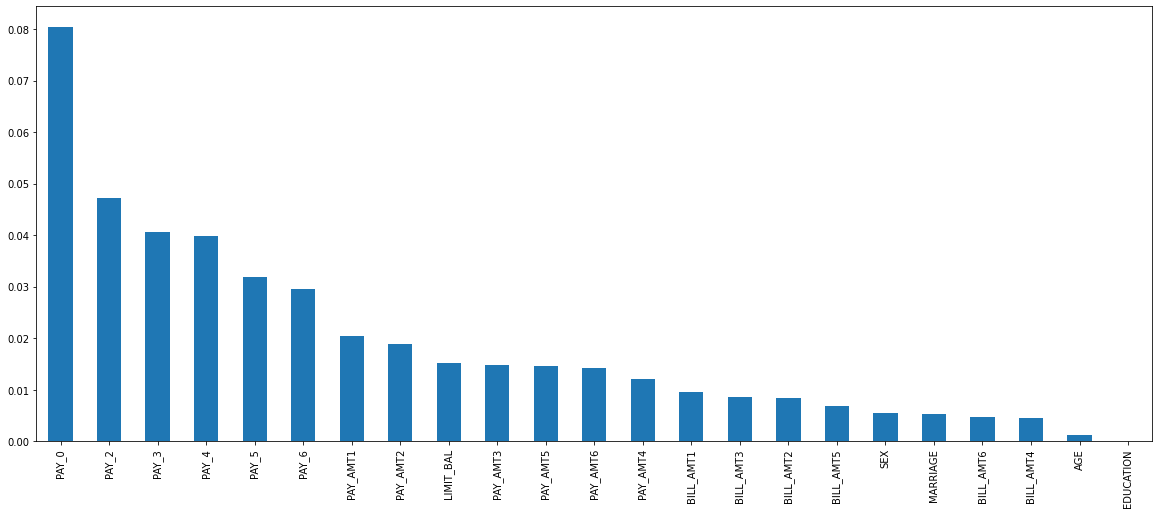

In [231]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [232]:
# Create and fit selector
selector = SelectKBest(mutual_info_classif, k=8)
selector.fit(trainX, trainy.values.ravel())
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
trainX = trainX.iloc[:,cols]
testX =testX.iloc[:,cols]

In [233]:
trainX.columns

Index(['LIMIT_BAL', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
       'PAY_AMT1'],
      dtype='object')

In [234]:

print(trainX.shape)
print(trainy.shape)
print(testX.shape)
print(testy.shape)

(21000, 8)
(21000, 1)
(9000, 8)
(9000, 1)


## Applying ML Models after Feature Selection Using Information Gain Approach

In [228]:
# Random Forest Classifier
rf = RandomForestClassifier(max_depth=10,n_estimators = 400)
rf.fit(trainX, trainy)
y_pred_rf = rf.predict(testX)
rf_acc = accuracy_score(testy, y_pred_rf)
print("Random Forest Accuracy:", rf_acc)

print('------------------------------------------------------------')

# Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(trainX, trainy)
y_pred_dt = dt.predict(testX)
dt_acc = accuracy_score(testy, y_pred_dt)
print("Decision Tree Accuracy:", dt_acc)

print('------------------------------------------------------------')

# XGBoost Classifier
xgb = XGBClassifier(learning_rate = 0.01, max_depth = 5)
xgb.fit(trainX, trainy)
y_pred_xgb = xgb.predict(testX)
xgb_acc = accuracy_score(testy, y_pred_xgb)
print("XGBoost Accuracy:", xgb_acc)

print('------------------------------------------------------------')

# Gradient Boosting Classifier
gb = GradientBoostingClassifier(learning_rate=0.01, max_depth=4, n_estimators=250)
gb.fit(trainX, trainy)
y_pred_gb = gb.predict(testX)
gb_acc = accuracy_score(testy, y_pred_gb)
print("Gradient Boosting Accuracy:", gb_acc)

# KNN Classifier
knn = KNeighborsClassifier(n_neighbors=45)
knn.fit(trainX, trainy)
y_pred_knn = knn.predict(testX)
knn_acc = accuracy_score(testy, y_pred_knn)
print("KNN Accuracy:", knn_acc* 100)


Random Forest Accuracy: 0.8204444444444444
------------------------------------------------------------
Decision Tree Accuracy: 0.7202222222222222
------------------------------------------------------------
XGBoost Accuracy: 0.8198888888888889
------------------------------------------------------------
Gradient Boosting Accuracy: 0.8202222222222222
KNN Accuracy: 77.94444444444444


### Hyperparameter Tuning of Models

In [226]:
# Hyper parameter tuning of XGBoost Classifier
xgb = XGBClassifier(learning_rate = 0.07, max_depth = 7)
xgb.fit(trainX, trainy)
y_pred_xgb = xgb.predict(testX)
xgb_acc = accuracy_score(testy, y_pred_xgb)
print("XGBoost Accuracy:", xgb_acc)

XGBoost Accuracy: 0.8225555555555556


In [227]:
# Gradient Boosting Classifier
gb = GradientBoostingClassifier(learning_rate=0.02, max_depth=6, n_estimators=150)
gb.fit(trainX, trainy)
y_pred_gb = gb.predict(testX)
gb_acc = accuracy_score(testy, y_pred_gb)
print("Gradient Boosting Accuracy:", gb_acc)

Gradient Boosting Accuracy: 0.8222222222222222


In [239]:
# Hyperparameter Tuning of KNN Classifier
knn = KNeighborsClassifier(n_neighbors=56)
knn.fit(trainX, trainy)
y_pred_knn = knn.predict(testX)
knn_acc = accuracy_score(testy, y_pred_knn)
print("KNN Accuracy:", knn_acc* 100)

KNN Accuracy: 77.97777777777777


In [240]:
# Hyperparameter Tuning Decision Tree Classifier
dt = DecisionTreeClassifier(max_depth=8, max_features='auto')
dt.fit(trainX, trainy)
y_pred_dt = dt.predict(testX)
dt_acc = accuracy_score(testy, y_pred_dt)
print("Decision Tree Accuracy:", dt_acc)

Decision Tree Accuracy: 0.8171111111111111


### Voting Classifier (Information Gain)

In [236]:
r0 = GradientBoostingClassifier(learning_rate = 0.01,max_depth=4,n_estimators=250)
r1 = RandomForestClassifier(max_depth=12,n_estimators = 150)
r2 = XGBClassifier(learning_rate = 0.03, max_depth = 6)

# In soft voting, every individual classifier provides a probability value that a specific data point belongs to a particular target class
voting = VotingClassifier([('gb1', r0),('gb2', r1),('gb3', r2)], voting='soft')
voting.fit(trainX,trainy.values.ravel())
y_pred_voting = voting.predict(testX)

In [237]:
AUC_Score = roc_auc_score(testy,y_pred_voting)
print("AUC Score:",AUC_Score)
print('------------------------------------')


accuracy = voting.score(testX, testy)
print("Accuracy of Voting Classifier:",accuracy*100,"%")
print('------------------------------------')

AUC Score: 0.6539427732240399
------------------------------------
Accuracy of Voting Classifier: 82.12222222222222 %
------------------------------------


In [241]:
r0 = GradientBoostingClassifier(learning_rate=0.02, max_depth=6, n_estimators=150)
r1 = RandomForestClassifier(max_depth=12,n_estimators = 147)
r2 = XGBClassifier(learning_rate = 0.07, max_depth = 7)
r3 = DecisionTreeClassifier(max_depth=8, max_features='auto')

# In soft voting, every individual classifier provides a probability value that a specific data point belongs to a particular target class
voting = VotingClassifier([('gb1', r0),('gb2', r1),('gb3', r2),('gb4', r3)], voting='soft')
voting.fit(trainX,trainy.values.ravel())
y_pred_voting = voting.predict(testX)

In [242]:
accuracy = voting.score(testX, testy)
print("Accuracy of Voting Classifier:",accuracy*100,"%")

Accuracy of Voting Classifier: 82.02222222222221 %


## Feature Selection Using Correlation Matrix

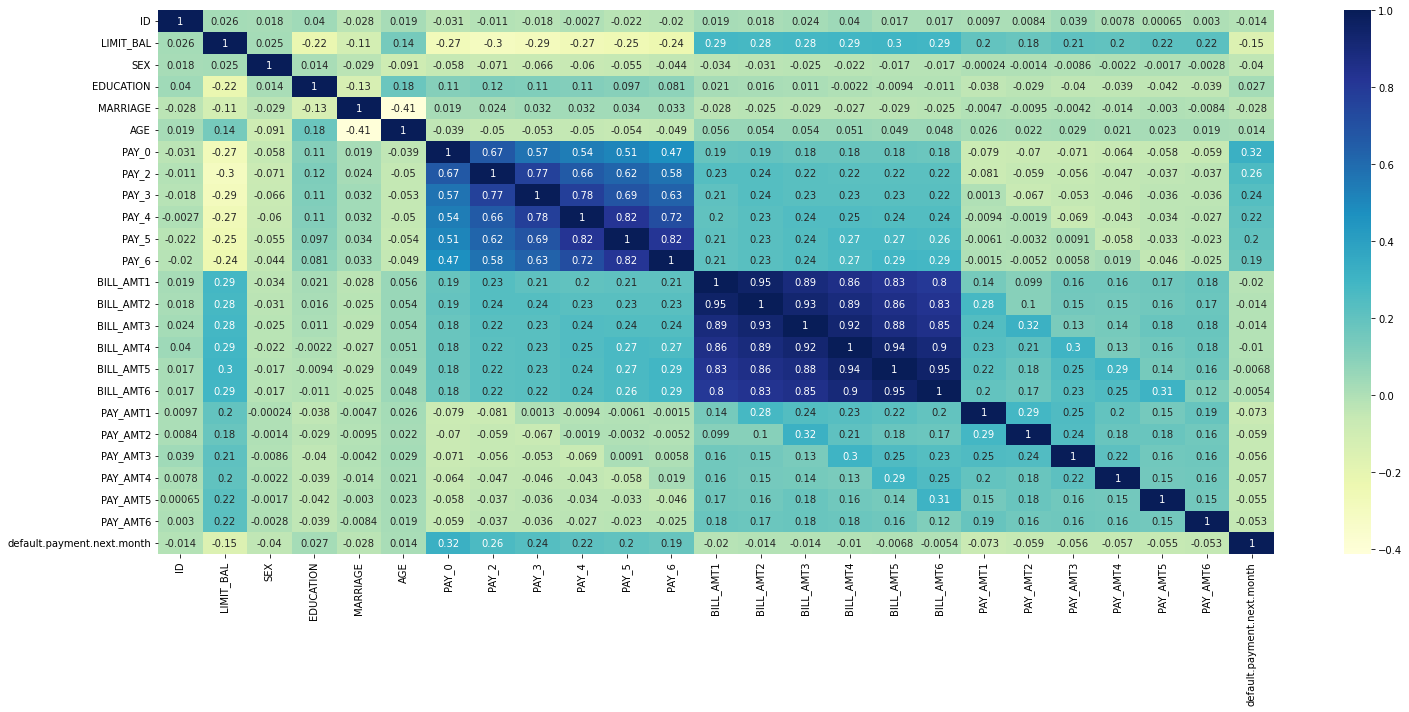

In [12]:
#Now lets try plotting the correlation heatmap

plt.figure(figsize = (25,10))
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)

plt.show()

### Splitting Dataset

In [22]:
X = data[['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','LIMIT_BAL','PAY_AMT2']]     # All columns except target variable.
y = data[['default.payment.next.month']]                          # Target Variable.

In [23]:
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3, random_state=2)
print(trainX.shape)
print(trainy.shape)
print(testX.shape)
print(testy.shape)

(21000, 8)
(21000, 1)
(9000, 8)
(9000, 1)


## Applying Machine Learning Models after Feature Selection Using Correlation Matrix

In [25]:
# Random Forest Classifier
rf = RandomForestClassifier(max_depth=10,n_estimators = 400)
rf.fit(trainX, trainy)
y_pred_rf = rf.predict(testX)
rf_acc = accuracy_score(testy, y_pred_rf)
print("Random Forest Accuracy:", rf_acc)

print('------------------------------------------------------------')

# Decision Tree Classifier
dt = DecisionTreeClassifier(max_depth=8, max_features='auto')
dt.fit(trainX, trainy)
y_pred_dt = dt.predict(testX)
dt_acc = accuracy_score(testy, y_pred_dt)
print("Decision Tree Accuracy:", dt_acc)

print('------------------------------------------------------------')

# XGBoost Classifier
xgb = XGBClassifier(learning_rate = 0.01, max_depth = 5)
xgb.fit(trainX, trainy)
y_pred_xgb = xgb.predict(testX)
xgb_acc = accuracy_score(testy, y_pred_xgb)
print("XGBoost Accuracy:", xgb_acc)

print('------------------------------------------------------------')

# Gradient Boosting Classifier
gb = GradientBoostingClassifier(learning_rate=0.01, max_depth=4, n_estimators=250)
gb.fit(trainX, trainy)
y_pred_gb = gb.predict(testX)
gb_acc = accuracy_score(testy, y_pred_gb)
print("Gradient Boosting Accuracy:", gb_acc)
print('------------------------------------------------------------')
# KNN Classifier
knn = KNeighborsClassifier(n_neighbors=45)
knn.fit(trainX, trainy)
y_pred_knn = knn.predict(testX)
knn_acc = accuracy_score(testy, y_pred_knn)
print("KNN Accuracy:", knn_acc* 100)


Random Forest Accuracy: 0.8224444444444444
------------------------------------------------------------
Decision Tree Accuracy: 0.82
------------------------------------------------------------
XGBoost Accuracy: 0.8228888888888889
------------------------------------------------------------
Gradient Boosting Accuracy: 0.8221111111111111
------------------------------------------------------------
KNN Accuracy: 78.46666666666667


### Hyper Parameter Tuning of Classifiers

In [60]:
# Gradient Boosting Classifier
gb = GradientBoostingClassifier(learning_rate=0.017, max_depth=5)
gb.fit(trainX, trainy)
y_pred_gb = gb.predict(testX)
gb_acc = accuracy_score(testy, y_pred_gb)
print("Gradient Boosting Accuracy:", gb_acc)

Gradient Boosting Accuracy: 0.8191111111111111


In [47]:
# Hyper parameter tuning of XGBoost Classifier
xgb = XGBClassifier(learning_rate = 0.012, max_depth = 5)
xgb.fit(trainX, trainy)
y_pred_xgb = xgb.predict(testX)
xgb_acc = accuracy_score(testy, y_pred_xgb)
print("XGBoost Accuracy:", xgb_acc)

XGBoost Accuracy: 0.823


In [49]:
# Hyper parameter tuning of XGBoost Classifier
xgb = XGBClassifier(learning_rate = 0.014, max_depth = 5)
xgb.fit(trainX, trainy)
y_pred_xgb = xgb.predict(testX)
xgb_acc = accuracy_score(testy, y_pred_xgb)
print("XGBoost Accuracy:", xgb_acc)

XGBoost Accuracy: 0.8231111111111111


### Voting Classifier (Best Model)

In [63]:
r0 = GradientBoostingClassifier(learning_rate=0.02, max_depth=6, n_estimators=150)
r1 = RandomForestClassifier(max_depth=12,n_estimators = 147)
r2 = XGBClassifier(learning_rate = 0.014, max_depth = 5)
r3 = DecisionTreeClassifier(max_depth=8, max_features='auto')

# In soft voting, every individual classifier provides a probability value that a specific data point belongs to a particular target class
voting = VotingClassifier([('gb1', r0),('gb2', r1),('gb3', r2),('gb4', r3)], voting='soft')
voting.fit(trainX,trainy.values.ravel())
y_pred_voting = voting.predict(testX)

In [64]:
accuracy = voting.score(testX, testy)
print("Accuracy of Voting Classifier:",accuracy*100,"%")

Accuracy of Voting Classifier: 82.33333333333334 %


##### This is the ultimate best model for our dataset which gave the best Accuracy.

## Conclusion

After performing a deep analysis on the dataset, we have successfully built a voting classifier model that has proven to be the best in predicting the outcome of our target variable. Through rigorous testing and evaluation, we have determined that the voting classifier model provides the most accurate and reliable predictions, surpassing all other models that we have explored.

We have use different feature selection techniques such as recrusive feature selection, feature selection on the basis of Information Gain, Using confusion matrix, feature selection using lasso regularization or by removing multi collinear features. Other than that, we have usedifferent techniques to increase the efficiency of the models such as K-Fold CV, Grid Search CV Hyperparameter Tuning and ensemble technique.

Our best model (Voting classifier) is getting highest accuracy of 83.33%.